<a href="https://colab.research.google.com/github/Aziz-Benamira/Autonomous-Parking-vehicle/blob/main/td5_pipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fluid-structure interaction

Class 5 : The fluid-conveyong pipe instability - numerical analysis

Contact : olivier.doare@ensta-paris.fr


# Fluid-conveying pipe instability

This is the second part of the exercise. We aim here at calculating the eigenfrequencies of a pipe with internal flow. In the first part, we obtained the equations of the system in the form of a beam equation with additionnal lineic forces due to the presence of an inviscid flowing fluid inside the pipe:
$$
\begin{equation}
\frac{\partial^4 w}{\partial {x}^4} + \frac{\partial^2 w}{\partial {t}^2} + u^2 \frac{\partial^2 w}{\partial {x}^2} + 2 \beta^{\frac{1}{2}}u \frac{\partial^2 w}{\partial {t} \partial {x}} = 0.
\end{equation}
$$
If the pipe is clamped upstream and free downstream, the boundary conditions are:
$$
w({x}=0)
= \left. \frac{\partial w}{\partial {x}} \right|_{{x}=0}
= \left. \frac{\partial^3 w}{\partial {x}^3} \right|_{{x}=1}
= \left. \frac{\partial^2 w}{\partial {x}^2}\right|_{{x}=1}
= 0.
$$

The proposed method consists of using the eigenmodes of the beam without flow as a basis for describing the dynamics of the pipe. The transverse displacement $w$ is then decomposed along the $N$ first modes of the beam without flow:
$$
w = \sum_{j=1}^{N} q_j(t) \phi_j(x)
$$
where $\phi_j(x)$ are the beam eigenmodes, given by
$$
\phi_j(x) = \cosh \lambda_j x
- \cos \lambda_j x
- \sigma_j \left( \sinh \lambda_j x
- \sin \lambda_j x
\right),
$$
$\lambda_j$ and $\sigma_j$ being:
$$
\cos \lambda_j \cosh \lambda_j + 1 = 0 \; , \quad \sigma_j = \frac{\sinh \lambda_j - \sin \lambda_j}{\cosh \lambda_j + \cos \lambda_j}.
$$

After having introduced this decomposition into the dynamic equation above, projected onto a mode $\phi_i(x)$ and made use of the orthogonality properties of the eigenmodes, we obtain $N$ coupled oscillator equations ($j \in [1,N]$),
$$
\ddot{q}_i + \lambda_i^4 q_i + u^2 \sum_j q_j c_{ij} + 2 \sqrt{\beta} u \sum_j \dot{q}_j b_{ij} = 0,
$$
with
$$
b_{ij} = \int_0^1 \phi_i(x) \phi'_j(x) \; , \quad
c_{ij} = \int_0^1 \phi_i(x) \phi''_j(x) .
$$
Let us write this set of equations in matrix form :
$$
\ddot{\vec{q}} + \left[ 2 \sqrt{\beta} u B \right] \dot{\vec{q}} + \left[ K_0 + u^2 C \right] \vec{q} = 0,
$$
where $K_0$ is the stiffness matrix of the system without fluid, the coefficients of the matrices $B$ and $C$ are given above, and $\vec{q}$ writes:
$$
\vec{q} = \left[
\begin{array}{c}
q_1 \\
q_2 \\
. \\
. \\
q_N
\end{array}
\right]
$$

If we look for harmonic solutions of this matrix system:
$$
\vec{q}(t) = \vec{V} \text{e}^{\text{i}\omega t}.
$$
We then have to solve this nonlinear eigenvalue problem,
$$
\left[ K_0 + u^2 C + 2 \text{i} \omega \sqrt{\beta}u B - \omega^2 \right] \vec{V} = 0.
$$
To compute the eigenvalues $\omega$, we could write that the determinant of the matrix in front of $\vec{V}$ has to vanish, leading to a large polynomial equation, whose roots are the values of $\omega$. We propose here to use a different method, that takes benefit of fast computational eigenvalues methods in Python. Let us write the above dynamical equation in the form of a larger order one problem:
$$
\left[
\begin{array}{cc}
\mathbb{I} & \mathbb{O}\\
\mathbb{O} & \mathbb{I}
\end{array}
\right]
\left[
\begin{array}{c}
\dot{\vec{q}} \\
\ddot{\vec{q}}
\end{array}
\right]
=
\left[
\begin{array}{cc}
\mathbb{O} & \mathbb{I} \\
- K_0 - u^2 C & - 2 \sqrt{\beta} u B
\end{array}
\right]
\left[
\begin{array}{c}
\vec{q}\\
\dot{\vec{q}}
\end{array}
\right]
$$
$$
\dot{\vec{z}} = A \vec{z}
$$
where $\mathbb{I}$ is the identity matrix and $\mathbb{O}$ is a matrix full of zeroes and $\vec{z}$ is a vector of size $2N$,
$$
\vec{z}=\left[
    \begin{array}{c}
    \vec{q} \\
    \dot{\vec{q}}
    \end{array}
\right]
$$
And looking for solutions in the harmonic form $\vec{z} = \vec{Z} \text{e}^{\nu t}$, the problem reduces to an eigenvalue problem:
$$
\nu \vec{Z} = A \vec{Z},
$$
which is easy to solve numerically (numpy.linalg.eig function).

Consider one eigenvalue/eigenvector pair $\nu_n$, $\vec{Z}_n$ the corresponding solution writes,
$$
\vec{z}=\left[
    \begin{array}{c}
    \vec{q} \\
    \dot{\vec{q}}
    \end{array}
\right]
=
\text{Re}\left(
\vec{Z}_n \text{e}^{\nu_n t}
\right)
=
\text{Re}\left(
\vec{Z}_n \text{e}^{\nu_{nr} t}\text{e}^{\text{i}\nu_{ni} t}
\right)
$$
Indices $r$ and $i$ refer to the real and imaginary parts respectively. The imaginary part of $\nu$ hence expresses the frequency of oscillation, while the real part eventually quantifies the growth rate of the amplitude of the oscillations. The solution in terms of the physical displacement $w(x,t)$ is then obtained by recombining the beam eigenmodes family $\phi_n(x)$ using the amplitudes of $\vec{Z}_n$.

In [ ]:
from beam_functions import (coefs_clafre as coefs,
                            mode_clafre as mode,
                            lambdasigma_clafre as lambdasigma)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import optimize

# ----------------------------------------------------------------
# In order to play the animation and depending on the software used,
# it may be necessary to uncomment one of the following line

# On linux
# %matplotlib tk

# On windows
# %matplotlib qt

# You can also try
# %matplotlib auto
#------------------------------------------------------------------


# -----------------------------------------------------------------
# The function match will be used to follow the eigenvalues
# when parameters are varied
def match(v1, v2):
    assert v1.ndim == v2.ndim == 1
    assert v1.shape[0] == v2.shape[0]
    dist = lambda x1, x2: abs(x1 - x2)
    n = v1.shape[0]
    t = np.dtype(dist(v1[0], v2[0]))
    dist_matrix = np.fromiter((dist(x1, x2) for x1 in v1 for x2 in v2),
                              dtype=t, count=n*n).reshape(n, n)
    row_ind, col_ind = optimize.linear_sum_assignment(dist_matrix)
    return v2[col_ind], col_ind


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We first fix the parameters of the study and calculate the matrix of coefficients. Here we just have to call the functions imported from beam_functions.py.

In [ ]:
# Number of modes
N = 20

# Coefficients phi_i * phiprime_j
B = coefs(N,0,1,0)

# Coefficients phi_i * phisecond_j
C = coefs(N,0,2,0)

# Coefficients phi_i * phisecondsecond_j
K0 = coefs(N,0,4,0)

# Coefficients phi_i * phi_j
M = coefs(N,0,0,0)

# We build the matrix of modes
# Each column represents one mode
# Each line represents one abscissa
lamb, sig = lambdasigma(N)
x = np.linspace(0,1,101)
phi = mode(lamb,sig,x,n=0)

## Calculation of eigenvalues in a range of velocities

We now select values of the parameters $\beta$ and $u$ to explore and implement the eigenvalue solving problem by creating the matrix $A(\beta,u)$ for each desired set of parameters.

### Computation in a range of $u$ for a given value of the mass ratio $\beta$ (Q4)
#### Here, we firstly choose $\beta=0$ to compute the eigenvalues of the problem for varying u.

In [ ]:
# Select a value of beta
beta = 0

# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)

# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for i in range(len(u)):

    # Stiffness matrix
    MK = K0+u[i]**2*C

    # Damping matrix
    MC = 2*np.sqrt(beta)*u[i]*B

    # Matrix for the problem at order one
    A = np.block([[O,I],[-MK,-MC]])

    # Eigenvalue problem solving
    val, vec = np.linalg.eig(A)

    # We store the current eigenvalues as a new line in the array evals
    # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
    # The next sets are sorted in order to minimise distance with previous set
    if i>0:
        evals[i,:], _ = match(evals[i-1,:],val)
    else:
        indices = np.argsort(np.abs(np.imag(val)))
        evals[i,:] = val[indices]

### Eigenvalues plot (Q4)

The evolution of the eigenvalues are now plotted for varying values of the dimensionless velocity u.

What happens when at least one eigenvalue has a positive imaginary part ?



#### Here, with the $\beta=0.5$ that we have chosen, we make the eigenvalues plot. When at least one eigenvalue has a positive imaginary part, the system is instable.

Text(0, 0.5, 'Imaginary part of nu')

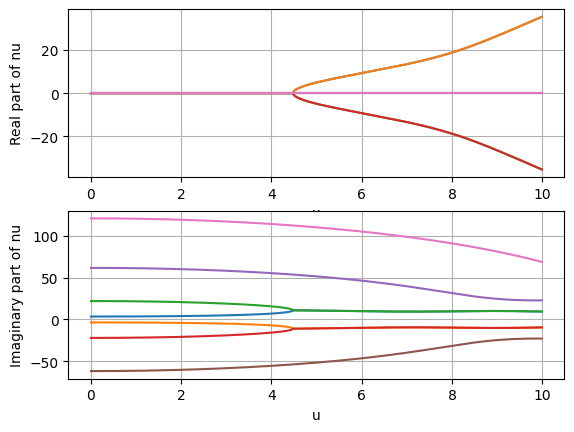

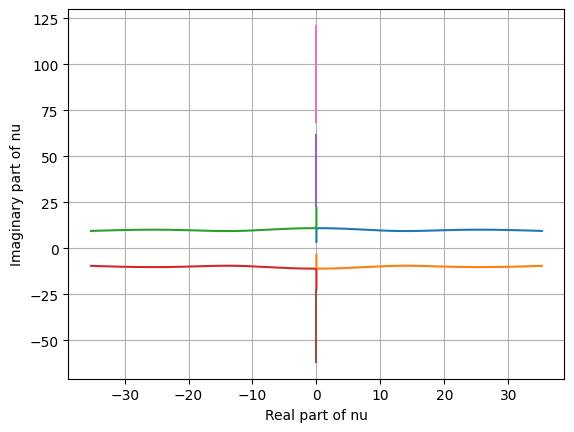

In [ ]:
# Number of eigenvalues to plot
n=8

f, a = plt.subplots(2,1)
a[0].grid(True)
a[0].plot(u,np.real(evals[:,0:n-1]))
a[0].set_xlabel('u')
a[0].set_ylabel('Real part of nu')
plt.grid(True)
a[1].plot(u,np.imag(evals[:,0:n-1]))
a[1].set_xlabel('u')
a[1].set_ylabel('Imaginary part of nu')

f1, a2 = plt.subplots(1,1)
a2.plot(np.real(evals[:,0:n-1]),np.imag(evals[:,0:n-1]))
a2.grid(True)
a2.set_xlabel('Real part of nu')
a2.set_ylabel('Imaginary part of nu')

####  Adding an 'if' function, we can also plot with the rest different $\beta$ at the same time. (Q4 continued)

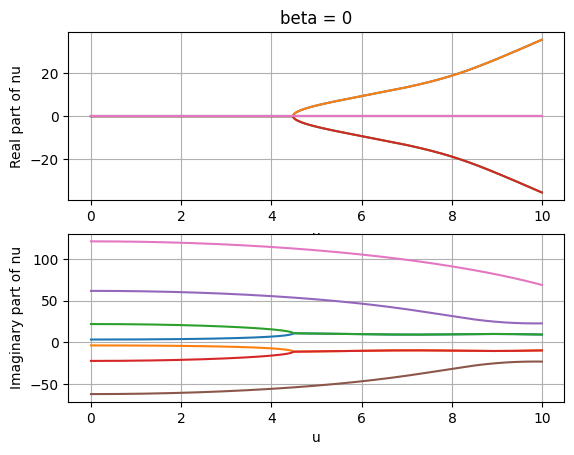

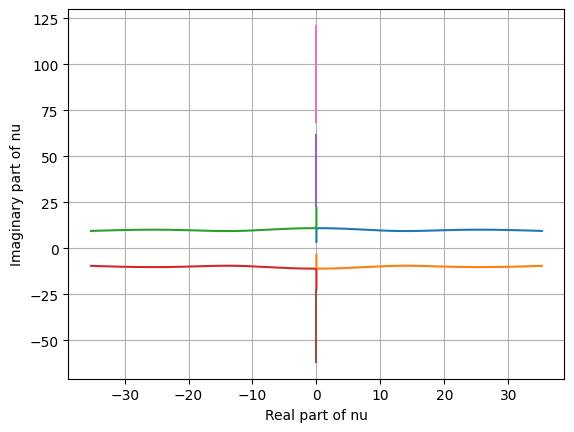

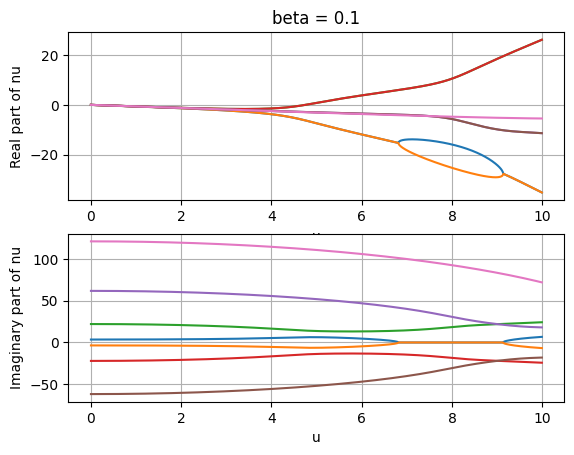

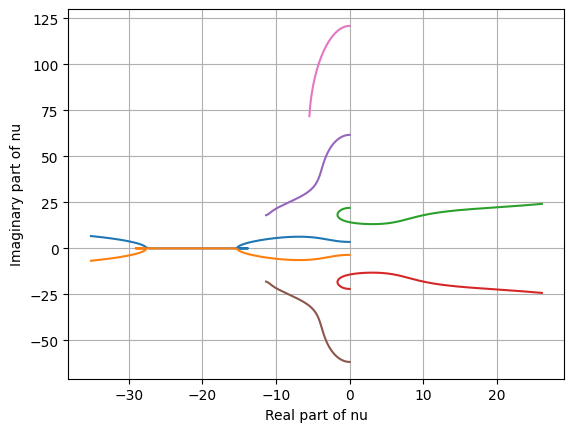

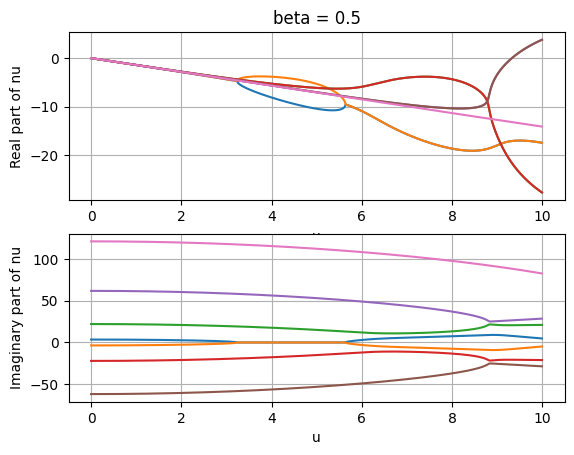

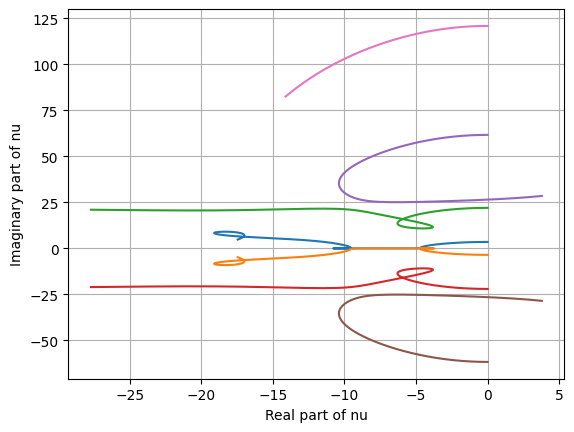

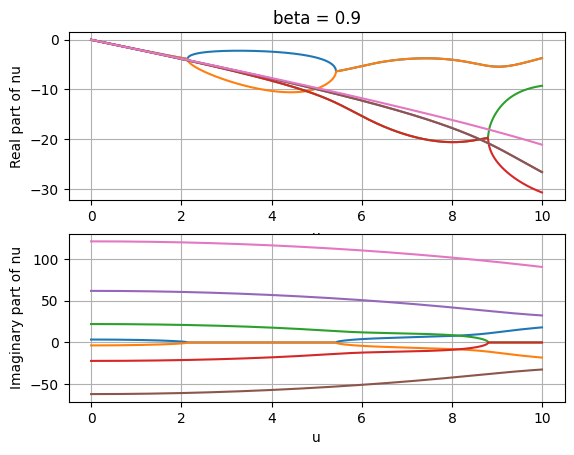

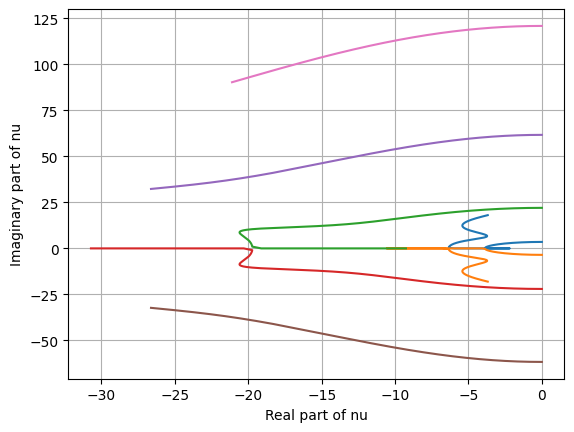

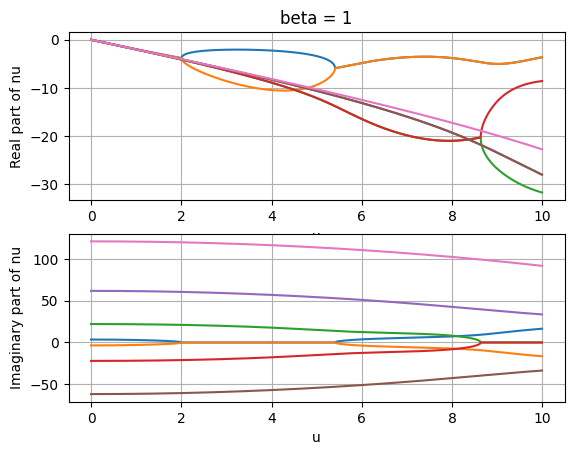

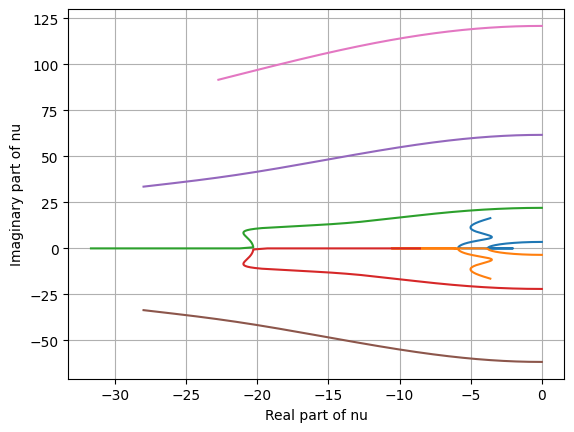

In [ ]:
# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# The list of beta in Question 4
beta = [0,0.1,0.5,0.9,1]

# evals is the array in which the eigenvalues will be stored for different beta
evals1 = np.zeros((len(u),2*N),dtype=complex)
evals2 = np.zeros((len(u),2*N),dtype=complex)
evals3 = np.zeros((len(u),2*N),dtype=complex)
evals4 = np.zeros((len(u),2*N),dtype=complex)
evals5 = np.zeros((len(u),2*N),dtype=complex)

# evals0 is the set in which the arrays (which store the eigenvalues for different beta) will be stored
evals0=[evals1,evals2,evals3,evals4,evals5]

# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for j in range(len(beta)): # Each j represents each case for a given beita
  evals=evals0[j] #evlas will stores the eigenvalues in the given beta
  for i in range(len(u)):

      # Stiffness matrix
      MK = K0+u[i]**2*C

      # Damping matrix
      MC = 2*np.sqrt(beta[j])*u[i]*B

      # Matrix for the problem at order one
      A = np.block([[O,I],[-MK,-MC]])

      # Eigenvalue problem solving
      val, vec = np.linalg.eig(A)

      # We store the current eigenvalues as a new line in the array evals
      # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
      # The next sets are sorted in order to minimise distance with previous set
      if i>0:
          evals[i,:], _ = match(evals[i-1,:],val)
      else:
          indices = np.argsort(np.abs(np.imag(val)))
          evals[i,:] = val[indices]
  evals0[j]=evals#We write the results of all the eigenvalues that we have got into the general set 'evals0'

# Number of eigenvalues to plot
n=8
for i in range(len(beta)):# we plot every case for different beta
  f, a = plt.subplots(2,1)
  a[0].set_title('beta = '+str(beta[i]))
  a[0].grid(True)
  a[0].plot(u,np.real(evals0[i][:,0:n-1]))
  a[0].set_xlabel('u')
  a[0].set_ylabel('Real part of nu')
  plt.grid(True)
  a[1].plot(u,np.imag(evals0[i][:,0:n-1]))
  a[1].set_xlabel('u')
  a[1].set_ylabel('Imaginary part of nu')

  f1, a2 = plt.subplots(1,1)
  a2.plot(np.real(evals0[i][:,0:n-1]),np.imag(evals0[i][:,0:n-1]))
  a2.grid(True)
  a2.set_xlabel('Real part of nu')
  a2.set_ylabel('Imaginary part of nu')


## Animation of the unstable dynamics (Q5)

We now select a particular set of the parameters $(\beta,u)$ and a particular initial condition along one beam mode. It has to be noted that this initial deformation does not correspond to an actual mode of the system with flow. It is however a simple way to distribute energy on all the modes of the system.

It is suggested to select parameters such that the system is just before or just after the transition to instability.

For instance:
- $\beta = 0.5$ and $u = 9.4$
- $\beta = 0.95$ and $u = 18.2$



### Here, we choose $\beta=0.5$, $u=9.2$ and $u=9.4$ because in the previous question we have $u_c\approx9.3$.

Text(0, 0.5, 'Imaginary part of the mode')

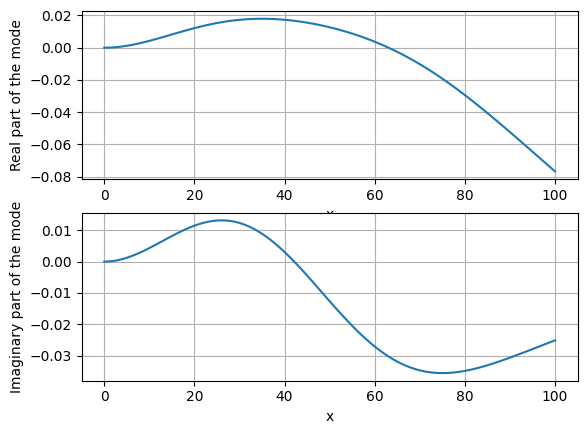

In [ ]:
# Select a value of beta
beta = 0.5

# Select a value of u
u = 9.2

# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# Eigenvalue problem

# Stiffness matrix
MK = K0+u**2*C

# Damping matrix
MC = 2*np.sqrt(beta)*u*B

# Matrix for the problem at order one
A = np.block([[O,I],[-MK,-MC]])

# Eigenvalue problem solving
val, vec = np.linalg.eig(A)

# We sort the eigenvalues to keep that with larger real part (growth rate)
indices = np.argsort(np.real(val))
valsorted = val[indices]
vecsorted = vec[:,indices]

# Matrix vecsorted expresses the eigenmodes in terms of coefficients
# of the beam modes. We need then to express them in terms of
# physical displacements by multiplying with the matrix of modes phi
psi = phi@vecsorted[0:N,:]

# Plot the mode with larger growth rate
# i.e. most amplified mode (or less damped)
f, a = plt.subplots(2,1)
a[0].grid(True)
a[0].plot(np.real(psi[:,0]))
a[0].set_xlabel('x')
a[0].set_ylabel('Real part of the mode')
plt.grid(True)
a[1].plot(np.imag(psi[:,0]))
a[1].set_xlabel('x')
a[1].set_ylabel('Imaginary part of the mode')

Text(0, 0.5, 'Imaginary part of the mode')

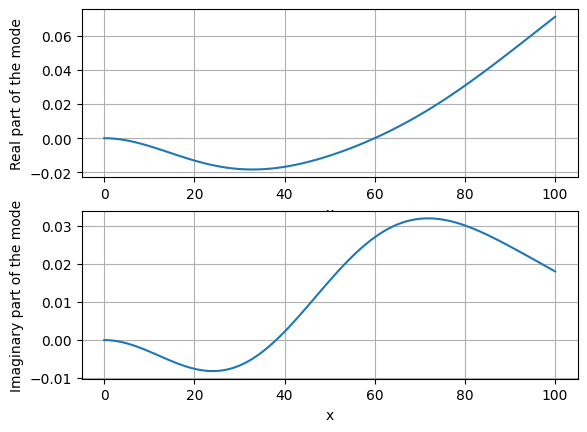

In [ ]:
# Select a value of beta
beta = 0.5

# Select a value of u
u = 9.4

# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# Eigenvalue problem

# Stiffness matrix
MK = K0+u**2*C

# Damping matrix
MC = 2*np.sqrt(beta)*u*B

# Matrix for the problem at order one
A = np.block([[O,I],[-MK,-MC]])

# Eigenvalue problem solving
val, vec = np.linalg.eig(A)

# We sort the eigenvalues to keep that with larger real part (growth rate)
indices = np.argsort(np.real(val))
valsorted = val[indices]
vecsorted = vec[:,indices]

# Matrix vecsorted expresses the eigenmodes in terms of coefficients
# of the beam modes. We need then to express them in terms of
# physical displacements by multiplying with the matrix of modes phi
psi = phi@vecsorted[0:N,:]

# Plot the mode with larger growth rate
# i.e. most amplified mode (or less damped)
f, a = plt.subplots(2,1)
a[0].grid(True)
a[0].plot(np.real(psi[:,0]))
a[0].set_xlabel('x')
a[0].set_ylabel('Real part of the mode')
plt.grid(True)
a[1].plot(np.imag(psi[:,0]))
a[1].set_xlabel('x')
a[1].set_ylabel('Imaginary part of the mode')


### Animation
Now that we have the eigenvalues and eigenmodes in terms of coefficients of the beam modes (array ```vecsorted```) or in terms of physical displacement at dicrete absissa (array ```psi```), we will use them to solve the dynamics for a given initial condition.

We first create the vector $\vec{z}_0$ representing the initial condition of the systems in the basis of the beam eignemodes (1D array ```z0```).

Next we express this initial condition in the new basis of the pipe eigenmodes. We will use a 1D array ```s0```:

$$
\vec{s}_0 = P^{-1} \vec{z}_0
$$.

In the Python script, we have referred to $P$ as ```vecsorted``` (the array with the eigenvector in colums, sorted).

Now that we are in the basis where matrix $A$ has been diagonalised, the solution along each eigenmode $i$ reads:

$$
s_{n} = s_{0n} \exp \left( \nu_n t \right)
$$

$\vec{s}$ is then known at each time. We can calculate $\vec{z}$ by using the base change matrix:

$$
\vec{z}(t) = P \vec{s}(t).
$$

And finally, we can obtain the pipe displacement by multiplying $\vec{q}$ by the matrix of eigenmodes:
$$
\vec{w}(t) = \phi \vec{q}(t),
$$
$\vec{q}(t)$ being the first half of the vector $\vec{z}(t)$.

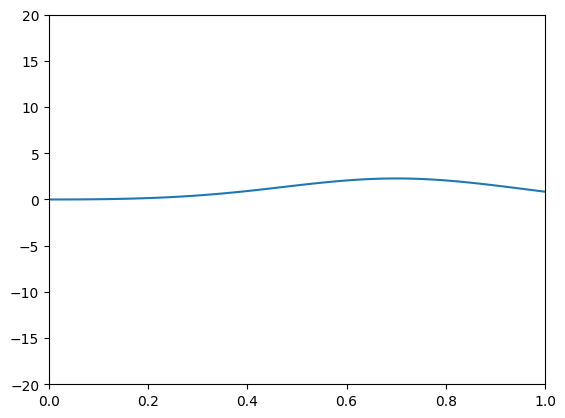

In [ ]:
# We choose as initial condition a deformation along
# the first mode of the pipe without flow, which is not
# an eigenmode of the system with flow
z0 = np.zeros(2*N)
z0[0] = 1

# To pass from a vector in the eigenmode basis of the beam
# without flow to the coefficients in the pipe basis,
# we use the inverse of the base change matrix
# (vecsorted, which contains the eigenvectors as columns)
s1 = np.linalg.inv(vecsorted)@z0
s0 = np.array(s1).flatten() # (this is necessary because s1 has not the correct shape)

# Time vector
t = np.linspace(0,4,1000)

# Calculation in the modal basis -> Independent mechanical oscillations
# r_i = Initial displacement * exp(lambda_i t)
s = s0*np.exp(np.outer(t,valsorted))

# Computation in the original basis
# (beam without fluid eigenmodes)
# We use here the base change matrix at each time step
z = s.copy() # (we create a matrix z of the same size as s)

# Fill the matrix z (each line is the state of the
# system a a given discrete time)
for i in range(len(t)):
    z[i,:] = z[i, :] = vecsorted @ s[i, :]

# Dans VSCode, ce bout de code fait l'animation
# fig = plt.figure()
# line, = plt.plot([], [],lw=5)
# plt.ylim(-20, 20)
# plt.xlim(0, 1)
# plt.xlabel('x')
# plt.ylabel('w')

# def animate(i):
#     y = phi@z[i,0:N]
#     line.set_data(x, np.real(y))
#     return line,

# anim = animation.FuncAnimation(fig, animate, frames=1000, blit=True, interval=20, repeat=False)


# Voici le code qui marche dans Google Colab
from IPython.display import HTML
from matplotlib import animation, rc, ticker

fig = plt.figure()
line, = plt.plot([], [])
plt.xlim(0, 1)
plt.ylim(-20, 20)

def animate(i):
  y = phi@z[i,0:N]
  line.set_data(x, np.real(y))
  return line,
anim = animation.FuncAnimation(fig, animate, frames=500, blit=True, interval=20, repeat=False)

HTML(anim.to_html5_video())
anim._repr_html_() is None
#equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim



## Clamped-Clamped Boundary Condition (Q6)
When the originally free end is clamped, the system transitions from \textit{clamped-free} to \textit{clamped-clamped} boundary conditions, which means zero displacement and slope at both ends
The eigenmodes $\phi_j(x)$ for a \textit{clamped-clamped} beam should be modified, where $\lambda_j$ and $\sigma_j$ are deternmined by:
$$
\cos\lambda_j\cosh\lambda_j - 1 = 0
$$
and
$$
\sigma_j = \frac{\sinh\lambda_j - \sin\lambda_j}{\cosh\lambda_j + \cos\lambda_j}
$$
From the defined function _beam\_functions_, we import _mode\_clacla_, _lambdasigma\_clacla_ and _coefs\_clacla_ to redefine the parameters in the previous questions, so that we are able to recalculate and solve the eigenvalue problem.


### Similar to the previous questions, we firsty plot the eigenvalues of the system.

Text(0, 0.5, 'Imaginary part of nu')

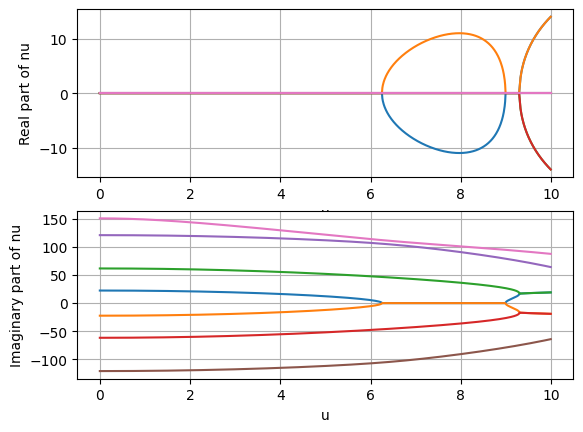

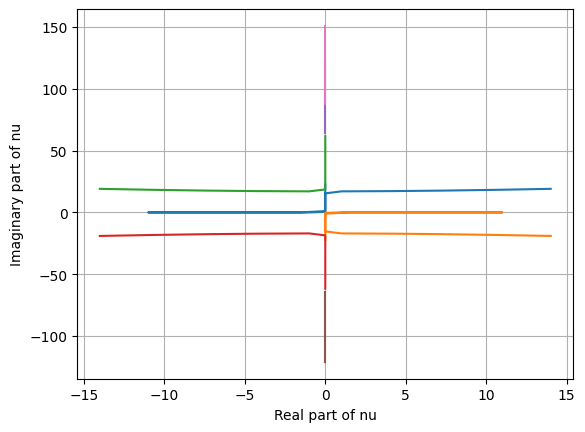

In [ ]:
# Change boundary conditions to clamped-clamped
from beam_functions import mode_clacla, lambdasigma_clacla, coefs_clacla

# Generate lambda and sigma for clamped-clamped beam
lamb, sig = lambdasigma_clacla(N)

# Recompute mode shapes phi with new boundary conditions
x = np.linspace(0, 1, 101)  # Discretize the pipe length
phi = mode_clacla(lamb, sig, x, n=0)  # Undeflected mode shapes

# Coefficients phi_i * phi_j
M = coefs(N,0,0,0)
# Recompute system matrices with clamped-clamped basis
B = coefs_clacla(N, 0, 1, 0)  # Cross-coupling matrix (modes × mode derivatives)
C = coefs_clacla(N, 0, 2, 0)  # Centrifugal stiffness matrix
K0 = coefs_clacla(N, 0, 4, 0)  # Structural stiffness matrix (diagonal)
# We use the same beta with question before
beta = 0.5
# Initialize eigenvalue analysis parameters
u = np.arange(0, 10, 0.01)  # Velocity range to scan
evals = np.zeros((len(u),2*N),dtype=complex)

# Zero and identity matrices for state-space formulation
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for i in range(len(u)):

    # Stiffness matrix
    MK = K0+u[i]**2*C

    # Damping matrix
    MC = 2*np.sqrt(beta)*u[i]*B

    # Matrix for the problem at order one
    A = np.block([[O,I],[-MK,-MC]])

    # Eigenvalue problem solving
    val, vec = np.linalg.eig(A)

    # We store the current eigenvalues as a new line in the array evals
    # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
    # The next sets are sorted in order to minimise distance with previous set
    if i>0:
        evals[i,:], _ = match(evals[i-1,:],val)
    else:
        indices = np.argsort(np.abs(np.imag(val)))
        evals[i,:] = val[indices]

# Number of eigenvalues to plot
n=8
f, a = plt.subplots(2,1)

a[0].grid(True)
a[0].plot(u,np.real(evals[:,0:n-1]))
a[0].set_xlabel('u')
a[0].set_ylabel('Real part of nu')
plt.grid(True)
a[1].plot(u,np.imag(evals[:,0:n-1]))
a[1].set_xlabel('u')
a[1].set_ylabel('Imaginary part of nu')

f1, a2 = plt.subplots(1,1)
a2.plot(np.real(evals[:,0:n-1]),np.imag(evals[:,0:n-1]))
a2.grid(True)
a2.set_xlabel('Real part of nu')
a2.set_ylabel('Imaginary part of nu')

### We then make the animation under the clamped-clamped boundary condition.

Text(0, 0.5, 'Imaginary part of the mode')

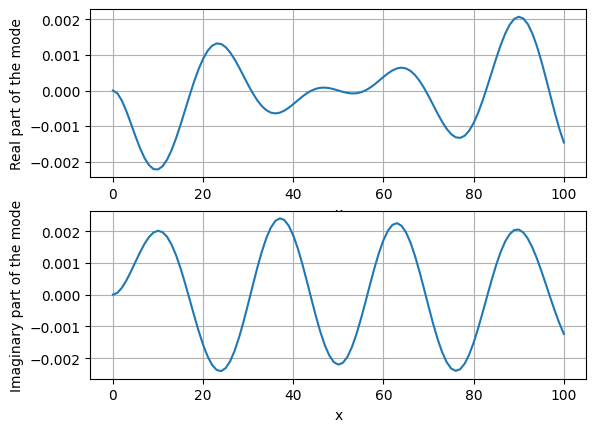

In [ ]:
# Select a value of beta
beta = 0.5

# Select a value of u
u = 6.2

# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# Eigenvalue problem

# Stiffness matrix
MK = K0+u**2*C

# Damping matrix
MC = 2*np.sqrt(beta)*u*B

# Matrix for the problem at order one
A = np.block([[O,I],[-MK,-MC]])

# Eigenvalue problem solving
val, vec = np.linalg.eig(A)

# We sort the eigenvalues to keep that with larger real part (growth rate)
indices = np.argsort(np.real(val))
valsorted = val[indices]
vecsorted = vec[:,indices]

# Matrix vecsorted expresses the eigenmodes in terms of coefficients
# of the beam modes. We need then to express them in terms of
# physical displacements by multiplying with the matrix of modes phi
psi = phi@vecsorted[0:N,:]

# Plot the mode with larger growth rate
# i.e. most amplified mode (or less damped)
f, a = plt.subplots(2,1)
a[0].grid(True)
a[0].plot(np.real(psi[:,0]))
a[0].set_xlabel('x')
a[0].set_ylabel('Real part of the mode')
plt.grid(True)
a[1].plot(np.imag(psi[:,0]))
a[1].set_xlabel('x')
a[1].set_ylabel('Imaginary part of the mode')

Text(0, 0.5, 'Imaginary part of the mode')

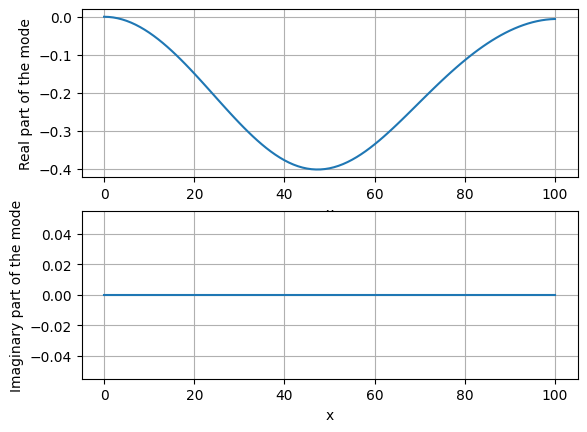

In [ ]:
# Select a value of beta
beta = 0.5

# Select a value of u
u = 6.4

# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# Eigenvalue problem

# Stiffness matrix
MK = K0+u**2*C

# Damping matrix
MC = 2*np.sqrt(beta)*u*B

# Matrix for the problem at order one
A = np.block([[O,I],[-MK,-MC]])

# Eigenvalue problem solving
val, vec = np.linalg.eig(A)

# We sort the eigenvalues to keep that with larger real part (growth rate)
indices = np.argsort(np.real(val))
valsorted = val[indices]
vecsorted = vec[:,indices]

# Matrix vecsorted expresses the eigenmodes in terms of coefficients
# of the beam modes. We need then to express them in terms of
# physical displacements by multiplying with the matrix of modes phi
psi = phi@vecsorted[0:N,:]

# Plot the mode with larger growth rate
# i.e. most amplified mode (or less damped)
f, a = plt.subplots(2,1)
a[0].grid(True)
a[0].plot(np.real(psi[:,0]))
a[0].set_xlabel('x')
a[0].set_ylabel('Real part of the mode')
plt.grid(True)
a[1].plot(np.imag(psi[:,0]))
a[1].set_xlabel('x')
a[1].set_ylabel('Imaginary part of the mode')

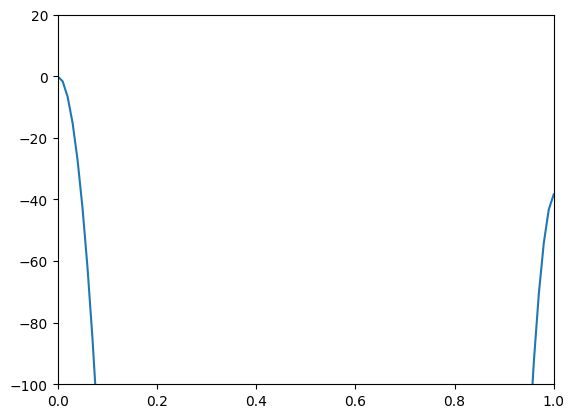

In [ ]:
# We choose as initial condition a deformation along
# the first mode of the pipe without flow, which is not
# an eigenmode of the system with flow
z0 = np.zeros(2*N)
z0[0] = 1

# To pass from a vector in the eigenmode basis of the beam
# without flow to the coefficients in the pipe basis,
# we use the inverse of the base change matrix
# (vecsorted, which contains the eigenvectors as columns)
s1 = np.linalg.inv(vecsorted)@z0
s0 = np.array(s1).flatten() # (this is necessary because s1 has not the correct shape)

# Time vector
t = np.linspace(0,4,1000)

# Calculation in the modal basis -> Independent mechanical oscillations
# r_i = Initial displacement * exp(lambda_i t)
s = s0*np.exp(np.outer(t,valsorted))

# Computation in the original basis
# (beam without fluid eigenmodes)
# We use here the base change matrix at each time step
z = s.copy() # (we create a matrix z of the same size as s)

# Fill the matrix z (each line is the state of the
# system a a given discrete time)
for i in range(len(t)):
    z[i,:] = z[i, :] = vecsorted @ s[i, :]

# Dans VSCode, ce bout de code fait l'animation
# fig = plt.figure()
# line, = plt.plot([], [],lw=5)
# plt.ylim(-20, 20)
# plt.xlim(0, 1)
# plt.xlabel('x')
# plt.ylabel('w')

# def animate(i):
#     y = phi@z[i,0:N]
#     line.set_data(x, np.real(y))
#     return line,

# anim = animation.FuncAnimation(fig, animate, frames=1000, blit=True, interval=20, repeat=False)


# Voici le code qui marche dans Google Colab
from IPython.display import HTML
from matplotlib import animation, rc, ticker

fig = plt.figure()
line, = plt.plot([], [])
plt.xlim(0, 1)
plt.ylim(-100, 20)

def animate(i):
  y = phi@z[i,0:N]
  line.set_data(x, np.real(y))
  return line,
anim = animation.FuncAnimation(fig, animate, frames=500, blit=True, interval=20, repeat=False)

HTML(anim.to_html5_video())
anim._repr_html_() is None
#equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim



## Effect of damping

We now propose to study the effect of damping by adding a simple viscous force on the dynamics, so that the dynamical equation is now of the form:
$$
\begin{equation}
\frac{\partial^4 w}{\partial {x}^4} + \frac{\partial^2 w}{\partial {t}^2} + u^2 \frac{\partial^2 w}{\partial {x}^2} + 2 \beta^{\frac{1}{2}}u \frac{\partial^2 w}{\partial {t} \partial {x}} + c\frac{\partial w}{\partial t}= 0.
\end{equation}
$$

The rest of the problem is unchanged.

### Here, we test the code by put $\beta=0$ and $c=0.1$.

Critical velocity for instability when β= 0 is u_c= 4.48
Critical velocity for instability when β= 0 is u_c= 4.48


Text(0, 0.5, 'Imaginary part of nu')

<Figure size 640x480 with 0 Axes>

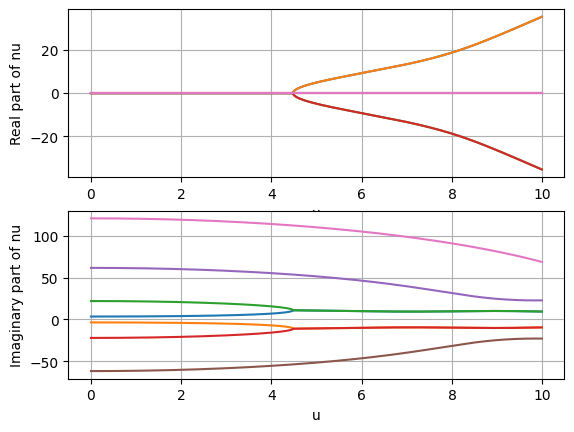

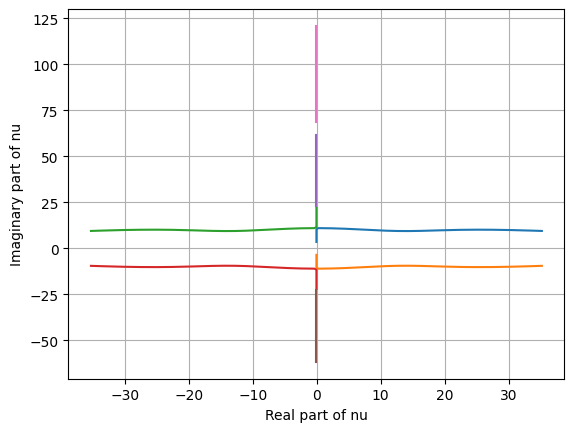

In [ ]:
# Number of modes
N = 20

# Coefficients phi_i * phiprime_j
B = coefs(N,0,1,0)

# Coefficients phi_i * phisecond_j
C = coefs(N,0,2,0)

# Coefficients phi_i * phisecondsecond_j
K0 = coefs(N,0,4,0)

# Coefficients phi_i * phi_j
M = coefs(N,0,0,0)

# We build the matrix of modes
# Each column represents one mode
# Each line represents one abscissa
lamb, sig = lambdasigma(N)
x = np.linspace(0,1,101)
phi = mode(lamb,sig,x,n=0)

# Select a value of beta
beta = 0

#Select a value of c
c = 0.1

# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)

# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
# We add a criterion for judging the stability and calculate the critical velocity for instability
stable=True
for i in range(len(u)):

    # Stiffness matrix
    MK = K0+u[i]**2*C

    # Damping matrix
    MC = 2*np.sqrt(beta)*u[i]*B+c*I  # Added damping term

    # Matrix for the problem at order one
    A = np.block([[O, I], [-MK, -MC]])

    # Eigenvalue problem solving
    valp, vl = np.linalg.eig(A)

    # We store the current eigenvalues as a new line in the array evals
    # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
    # The next sets are sorted in order to minimise distance with previous set
    if i>0:
        evals[i,:], _ = match(evals[i-1,:],valp)
    else:
        indices = np.argsort(np.abs(np.imag(valp)))
        evals[i,:] = valp[indices]
    # We seek for the first postive eigenvalue and its correponding velocity
    for k in range(len(evals[i,:])):
      if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
          stable=False
          print('Critical velocity for instability when β=',beta, 'is u_c=',u[i])
if stable==True:
  print('The system is stable for β=',beta)

# Number of eigenvalues to plot
n=8

plt.figure(1)
f, a = plt.subplots(2,1)
a[0].grid(True)
a[0].plot(u,np.real(evals[:,0:n-1]))
a[0].set_xlabel('u')
a[0].set_ylabel('Real part of nu')
plt.grid(True)
a[1].plot(u,np.imag(evals[:,0:n-1]))
a[1].set_xlabel('u')
a[1].set_ylabel('Imaginary part of nu')

f1, a2 = plt.subplots(1,1)
a2.plot(np.real(evals[:,0:n-1]),np.imag(evals[:,0:n-1]))
a2.grid(True)
a2.set_xlabel('Real part of nu')
a2.set_ylabel('Imaginary part of nu')



### Now we plot the dynamics of the system by put different $c$ with different $\beta$ given.

### c=0.1

Critical velocity for instability when β= 0 is u_c= 4.48
Critical velocity for instability when β= 0 is u_c= 4.48
Critical velocity for instability when β= 0.1 is u_c= 4.7700000000000005
Critical velocity for instability when β= 0.1 is u_c= 4.7700000000000005
Critical velocity for instability when β= 0.5 is u_c= 9.33
Critical velocity for instability when β= 0.5 is u_c= 9.33
The system is stable for β= 0.9
The system is stable for β= 1


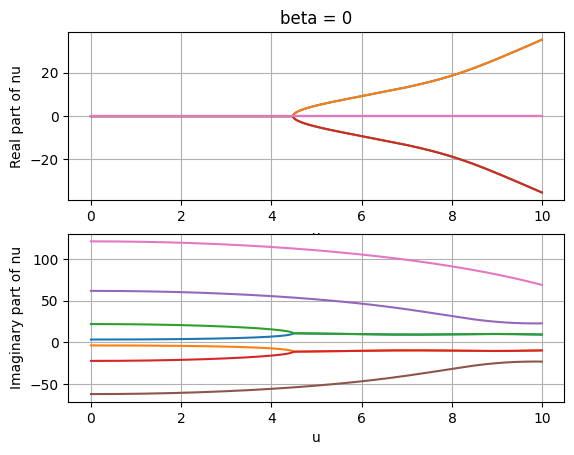

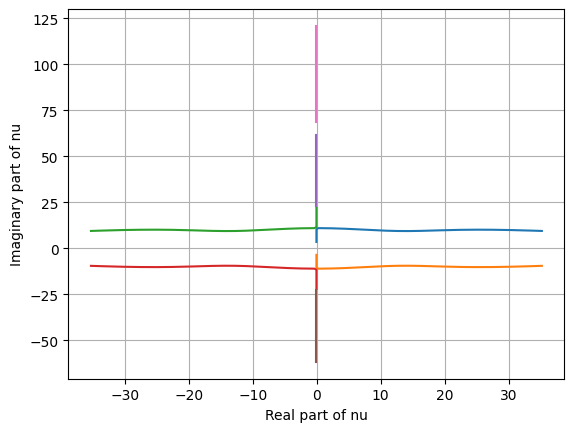

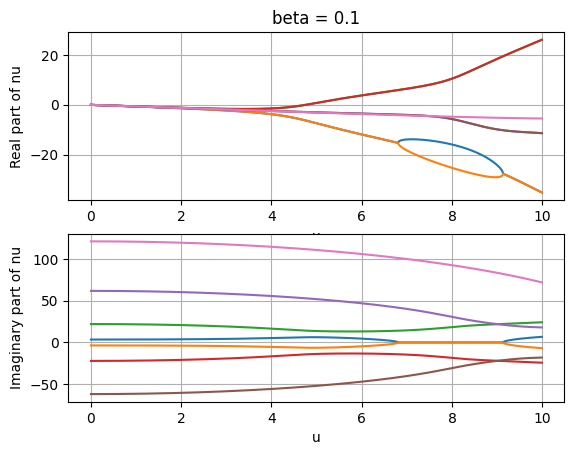

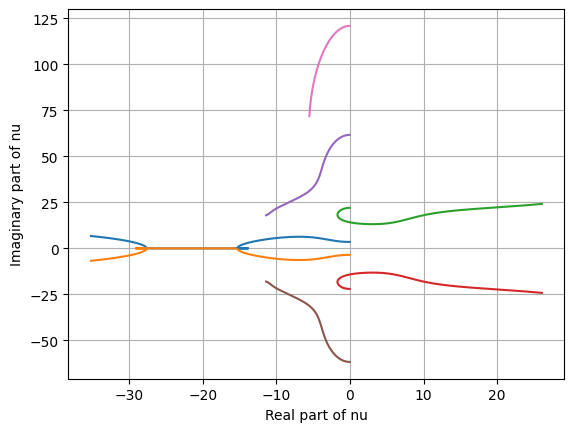

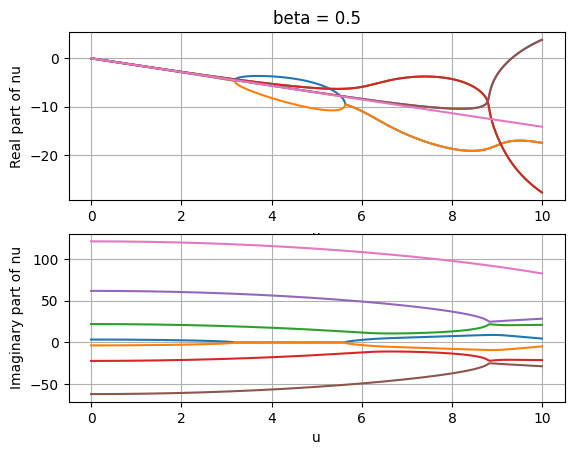

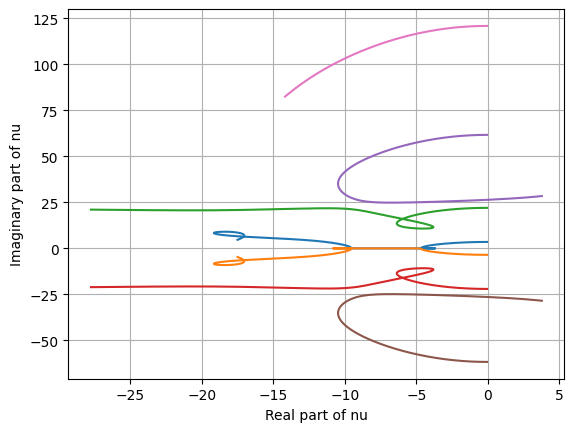

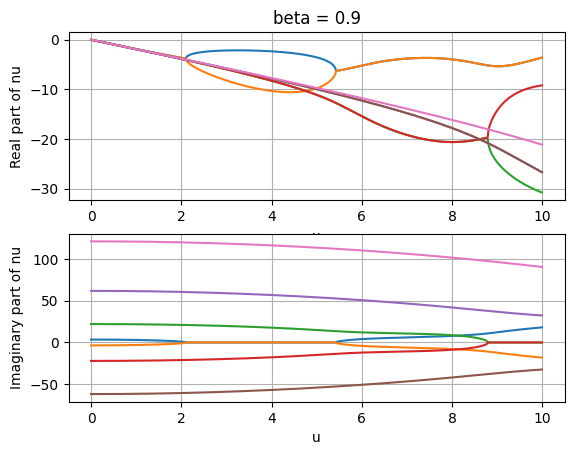

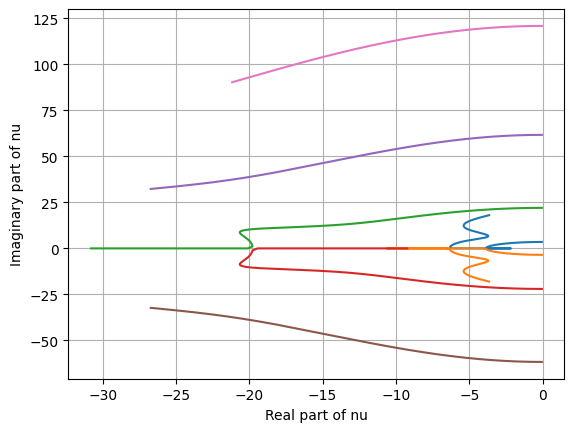

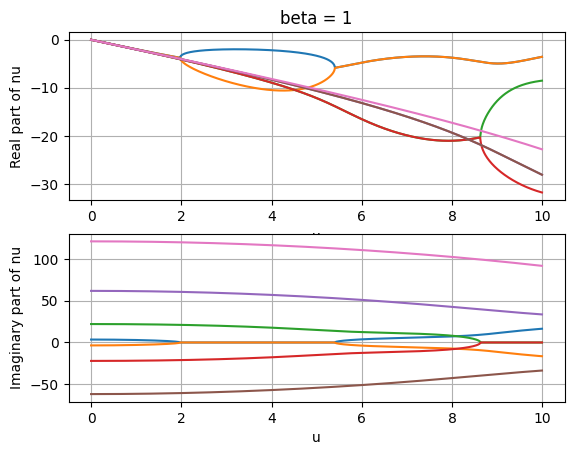

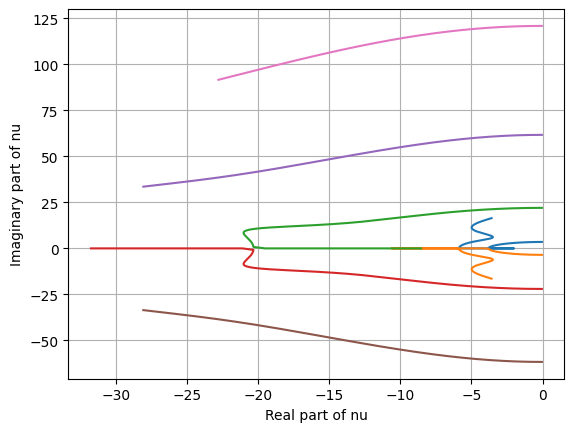

In [ ]:
#Select a value of c
c = 0.1


# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)


# Select a value of beta
beta = [0,0.1,0.5,0.9,1]


# evals is the array in which the eigenvalues will be stored
evals1 = np.zeros((len(u),2*N),dtype=complex)
evals2 = np.zeros((len(u),2*N),dtype=complex)
evals3 = np.zeros((len(u),2*N),dtype=complex)
evals4 = np.zeros((len(u),2*N),dtype=complex)
evals5 = np.zeros((len(u),2*N),dtype=complex)
evals0=[evals1,evals2,evals3,evals4,evals5]
# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for j in range(len(beta)):
  evals=evals0[j]
  stable=True
  for i in range(len(u)):

      # Stiffness matrix
      MK = K0+u[i]**2*C

      # Damping matrix
      MC = 2*np.sqrt(beta[j])*u[i]*B+c*I

      # Matrix for the problem at order one
      A = np.block([[O,I],[-MK,-MC]])

      # Eigenvalue problem solving
      val, vec = np.linalg.eig(A)

      # We store the current eigenvalues as a new line in the array evals
      # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
      # The next sets are sorted in order to minimise distance with previous set
      if i>0:
          evals[i,:], _ = match(evals[i-1,:],val)
      else:
          indices = np.argsort(np.abs(np.imag(val)))
          evals[i,:] = val[indices]
      for k in range(len(evals[i,:])):
        if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
          stable=False
          print('Critical velocity for instability when β=',beta[j], 'is u_c=',u[i])
  if stable==True:
    print('The system is stable for β=',beta[j])

  evals0[j]=evals
# Number of eigenvalues to plot
n=8
for i in range(len(beta)):
  f, a = plt.subplots(2,1)
  a[0].set_title('beta = '+str(beta[i]))
  a[0].grid(True)
  a[0].plot(u,np.real(evals0[i][:,0:n-1]))
  a[0].set_xlabel('u')
  a[0].set_ylabel('Real part of nu')
  plt.grid(True)
  a[1].plot(u,np.imag(evals0[i][:,0:n-1]))
  a[1].set_xlabel('u')
  a[1].set_ylabel('Imaginary part of nu')

  f1, a2 = plt.subplots(1,1)
  a2.plot(np.real(evals0[i][:,0:n-1]),np.imag(evals0[i][:,0:n-1]))
  a2.grid(True)
  a2.set_xlabel('Real part of nu')
  a2.set_ylabel('Imaginary part of nu')


### c=0.2

Critical velocity for instability when β= 0 is u_c= 4.48
Critical velocity for instability when β= 0 is u_c= 4.48
Critical velocity for instability when β= 0.1 is u_c= 4.79
Critical velocity for instability when β= 0.1 is u_c= 4.79
Critical velocity for instability when β= 0.5 is u_c= 9.33
Critical velocity for instability when β= 0.5 is u_c= 9.33
The system is stable for β= 0.9
The system is stable for β= 1


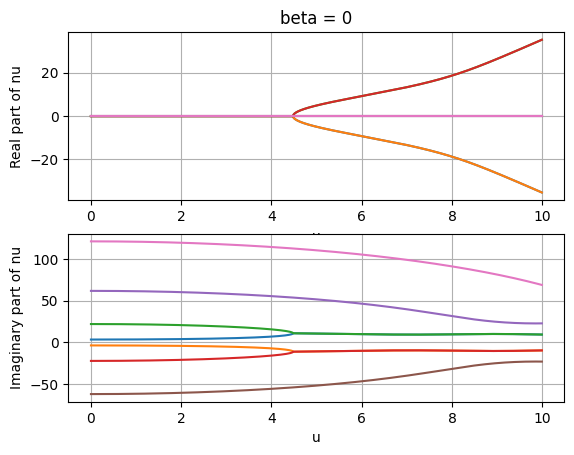

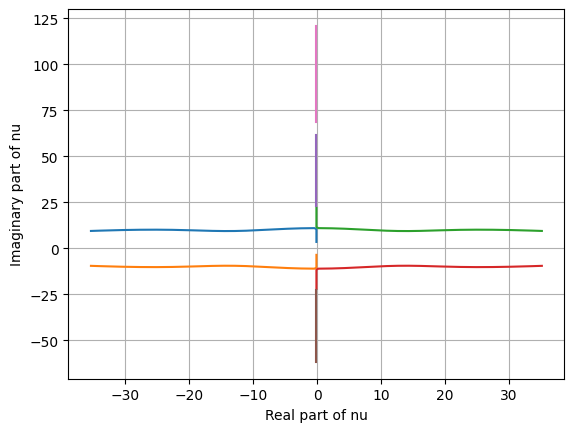

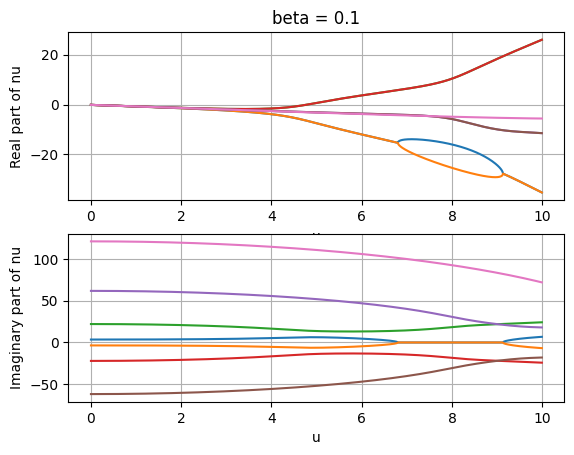

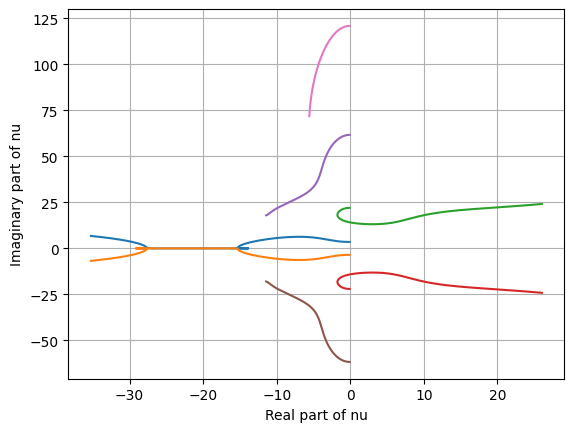

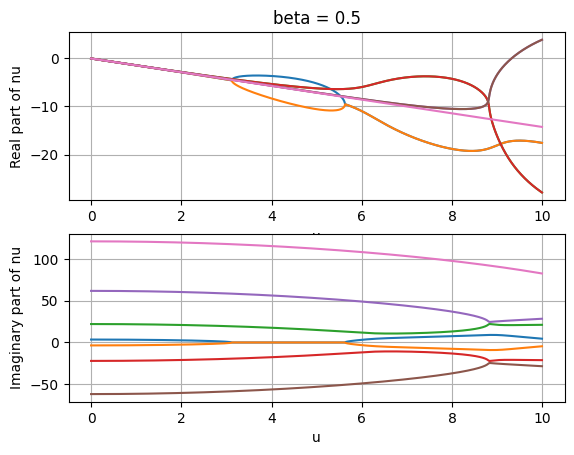

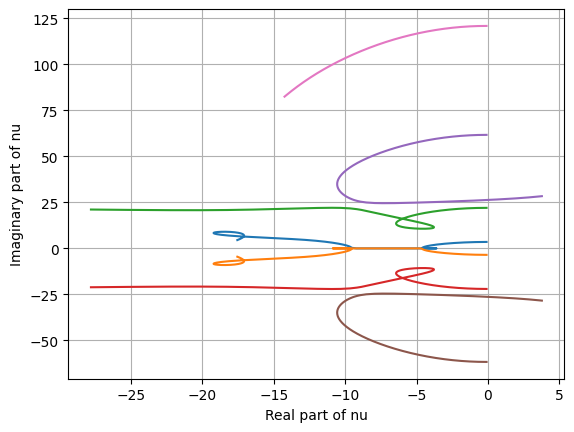

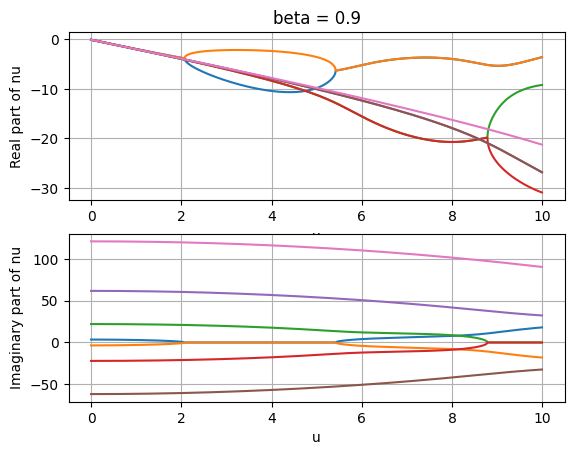

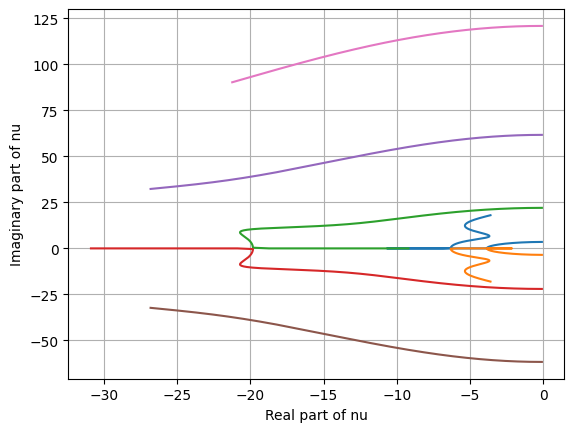

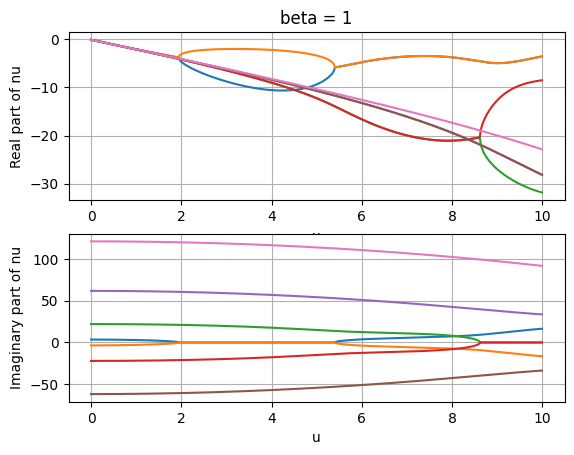

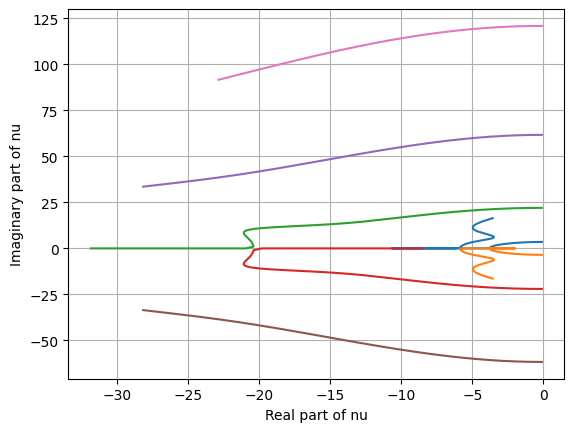

In [ ]:
#Select a value of c
c = 0.2


# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)


# Select a value of beta
beta = [0,0.1,0.5,0.9,1]


# evals is the array in which the eigenvalues will be stored
evals1 = np.zeros((len(u),2*N),dtype=complex)
evals2 = np.zeros((len(u),2*N),dtype=complex)
evals3 = np.zeros((len(u),2*N),dtype=complex)
evals4 = np.zeros((len(u),2*N),dtype=complex)
evals5 = np.zeros((len(u),2*N),dtype=complex)
evals0=[evals1,evals2,evals3,evals4,evals5]
# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for j in range(len(beta)):
  evals=evals0[j]
  stable=True
  for i in range(len(u)):

      # Stiffness matrix
      MK = K0+u[i]**2*C

      # Damping matrix
      MC = 2*np.sqrt(beta[j])*u[i]*B+c*I

      # Matrix for the problem at order one
      A = np.block([[O,I],[-MK,-MC]])

      # Eigenvalue problem solving
      val, vec = np.linalg.eig(A)

      # We store the current eigenvalues as a new line in the array evals
      # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
      # The next sets are sorted in order to minimise distance with previous set
      if i>0:
          evals[i,:], _ = match(evals[i-1,:],val)
      else:
          indices = np.argsort(np.abs(np.imag(val)))
          evals[i,:] = val[indices]
      for k in range(len(evals[i,:])):
        if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
          stable=False
          print('Critical velocity for instability when β=',beta[j], 'is u_c=',u[i])
  if stable==True:
    print('The system is stable for β=',beta[j])

  evals0[j]=evals
# Number of eigenvalues to plot
n=8
for i in range(len(beta)):
  f, a = plt.subplots(2,1)
  a[0].set_title('beta = '+str(beta[i]))
  a[0].grid(True)
  a[0].plot(u,np.real(evals0[i][:,0:n-1]))
  a[0].set_xlabel('u')
  a[0].set_ylabel('Real part of nu')
  plt.grid(True)
  a[1].plot(u,np.imag(evals0[i][:,0:n-1]))
  a[1].set_xlabel('u')
  a[1].set_ylabel('Imaginary part of nu')

  f1, a2 = plt.subplots(1,1)
  a2.plot(np.real(evals0[i][:,0:n-1]),np.imag(evals0[i][:,0:n-1]))
  a2.grid(True)
  a2.set_xlabel('Real part of nu')
  a2.set_ylabel('Imaginary part of nu')


### c=1

Critical velocity for instability when β= 0 is u_c= 4.49
Critical velocity for instability when β= 0 is u_c= 4.49
Critical velocity for instability when β= 0.1 is u_c= 4.94
Critical velocity for instability when β= 0.1 is u_c= 4.94
Critical velocity for instability when β= 0.5 is u_c= 9.34
Critical velocity for instability when β= 0.5 is u_c= 9.34
The system is stable for β= 0.9
The system is stable for β= 1


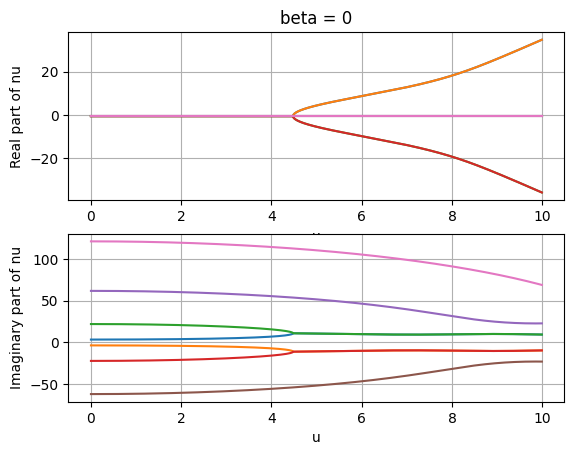

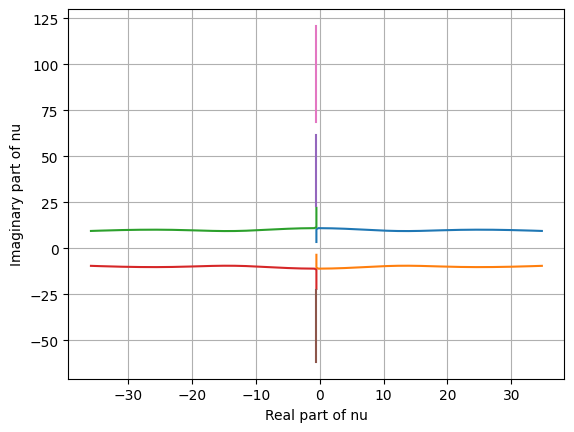

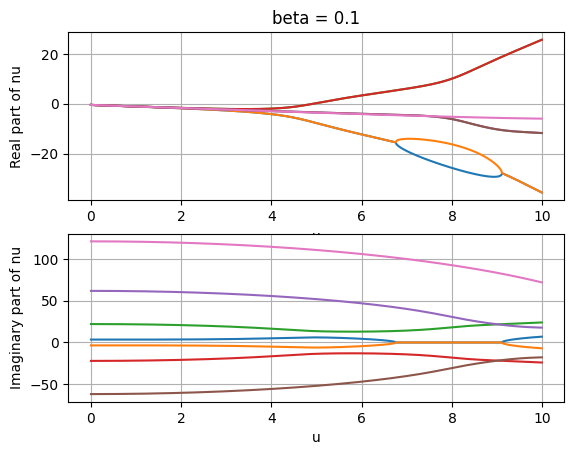

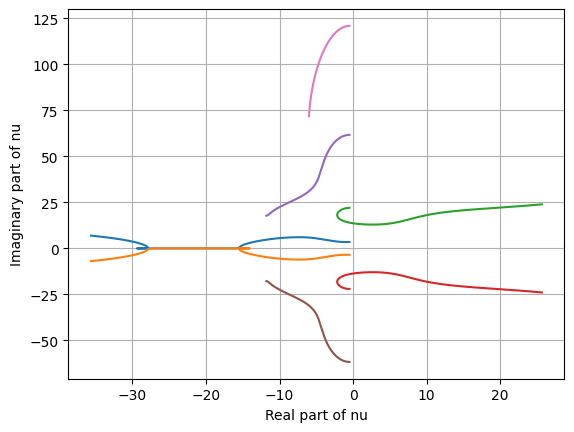

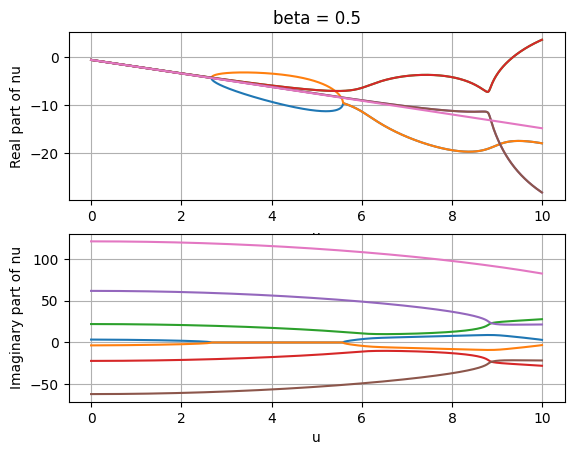

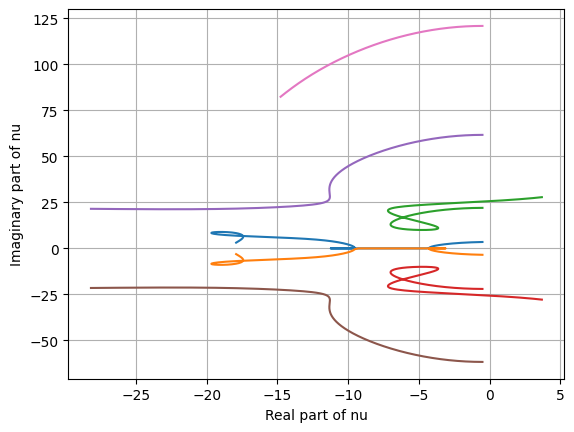

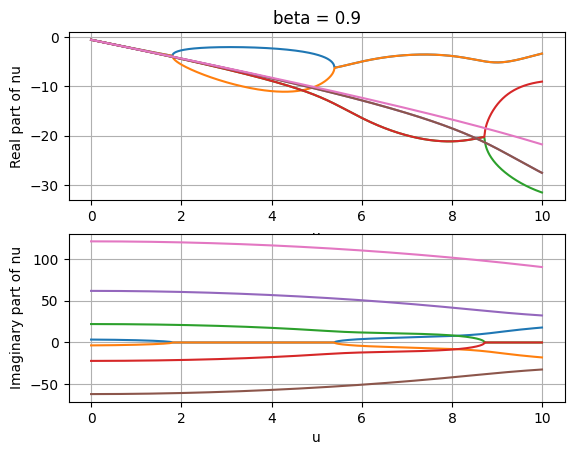

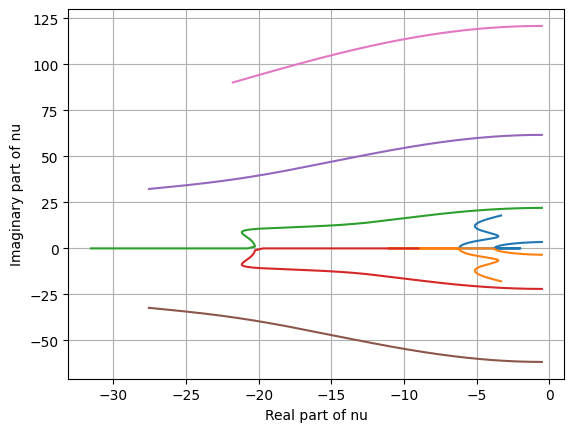

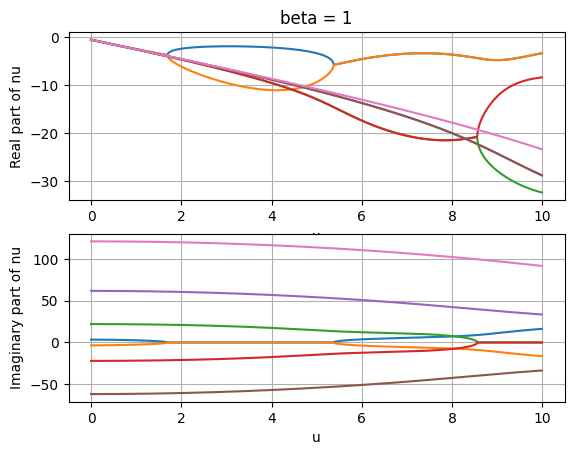

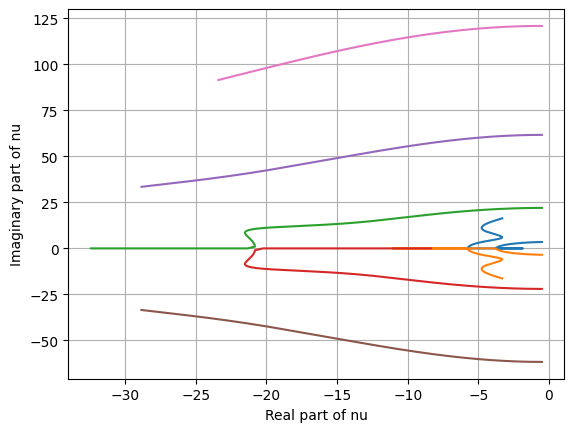

In [ ]:
#Select a value of c
c = 1


# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)


# Select a value of beta
beta = [0,0.1,0.5,0.9,1]


# evals is the array in which the eigenvalues will be stored
evals1 = np.zeros((len(u),2*N),dtype=complex)
evals2 = np.zeros((len(u),2*N),dtype=complex)
evals3 = np.zeros((len(u),2*N),dtype=complex)
evals4 = np.zeros((len(u),2*N),dtype=complex)
evals5 = np.zeros((len(u),2*N),dtype=complex)
evals0=[evals1,evals2,evals3,evals4,evals5]
# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for j in range(len(beta)):
  evals=evals0[j]
  stable=True
  for i in range(len(u)):

      # Stiffness matrix
      MK = K0+u[i]**2*C

      # Damping matrix
      MC = 2*np.sqrt(beta[j])*u[i]*B+c*I

      # Matrix for the problem at order one
      A = np.block([[O,I],[-MK,-MC]])

      # Eigenvalue problem solving
      val, vec = np.linalg.eig(A)

      # We store the current eigenvalues as a new line in the array evals
      # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
      # The next sets are sorted in order to minimise distance with previous set
      if i>0:
          evals[i,:], _ = match(evals[i-1,:],val)
      else:
          indices = np.argsort(np.abs(np.imag(val)))
          evals[i,:] = val[indices]
      for k in range(len(evals[i,:])):
        if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
          stable=False
          print('Critical velocity for instability when β=',beta[j], 'is u_c=',u[i])
  if stable==True:
    print('The system is stable for β=',beta[j])

  evals0[j]=evals
# Number of eigenvalues to plot
n=8
for i in range(len(beta)):
  f, a = plt.subplots(2,1)
  a[0].set_title('beta = '+str(beta[i]))
  a[0].grid(True)
  a[0].plot(u,np.real(evals0[i][:,0:n-1]))
  a[0].set_xlabel('u')
  a[0].set_ylabel('Real part of nu')
  plt.grid(True)
  a[1].plot(u,np.imag(evals0[i][:,0:n-1]))
  a[1].set_xlabel('u')
  a[1].set_ylabel('Imaginary part of nu')

  f1, a2 = plt.subplots(1,1)
  a2.plot(np.real(evals0[i][:,0:n-1]),np.imag(evals0[i][:,0:n-1]))
  a2.grid(True)
  a2.set_xlabel('Real part of nu')
  a2.set_ylabel('Imaginary part of nu')


### c=2

Critical velocity for instability when β= 0 is u_c= 4.51
Critical velocity for instability when β= 0 is u_c= 4.51
Critical velocity for instability when β= 0.1 is u_c= 5.1000000000000005
Critical velocity for instability when β= 0.1 is u_c= 5.1000000000000005
Critical velocity for instability when β= 0.5 is u_c= 9.35
Critical velocity for instability when β= 0.5 is u_c= 9.35
The system is stable for β= 0.9
The system is stable for β= 1


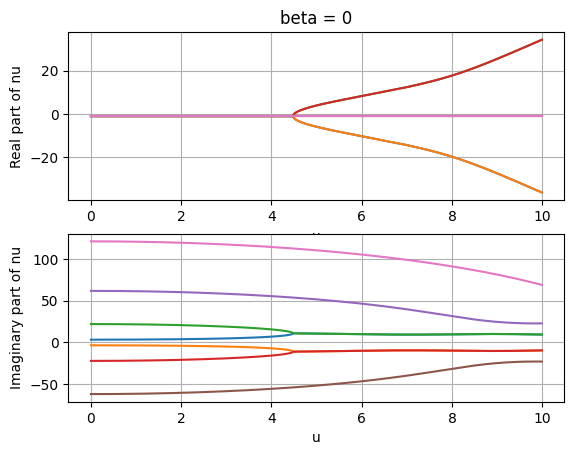

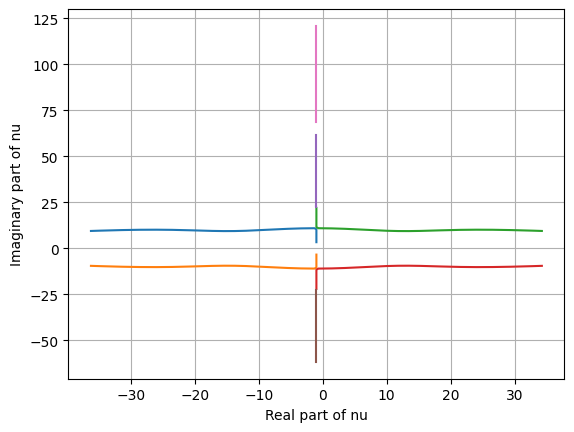

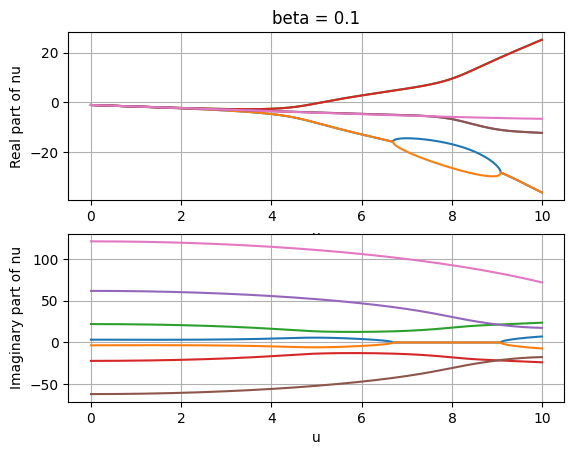

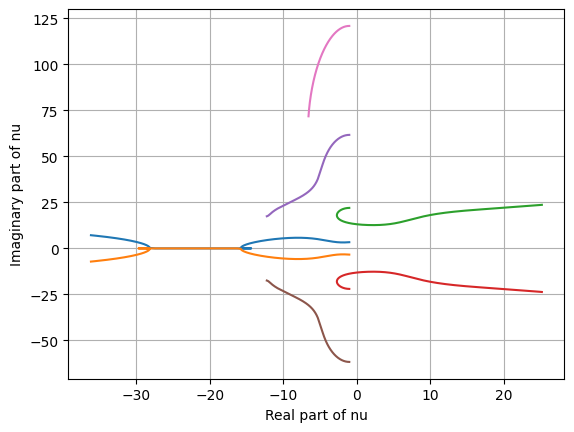

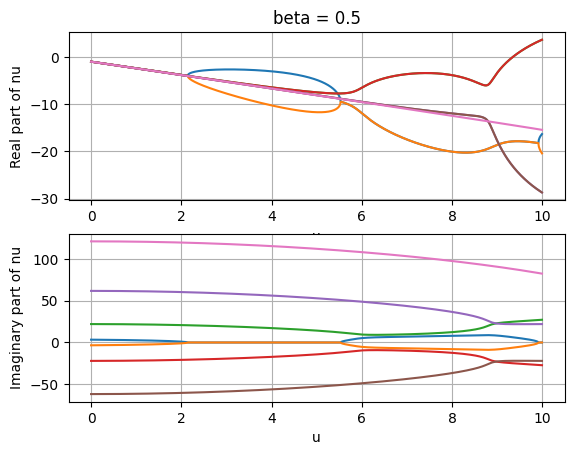

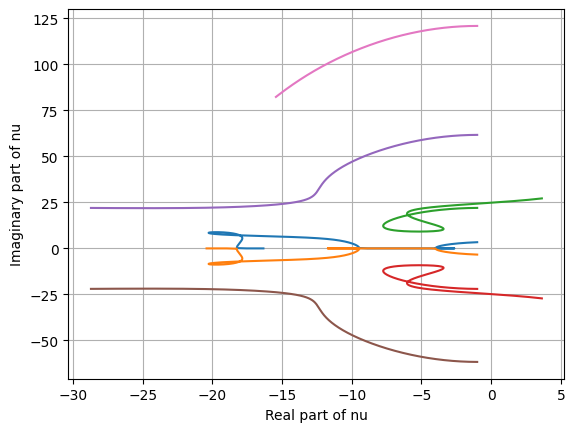

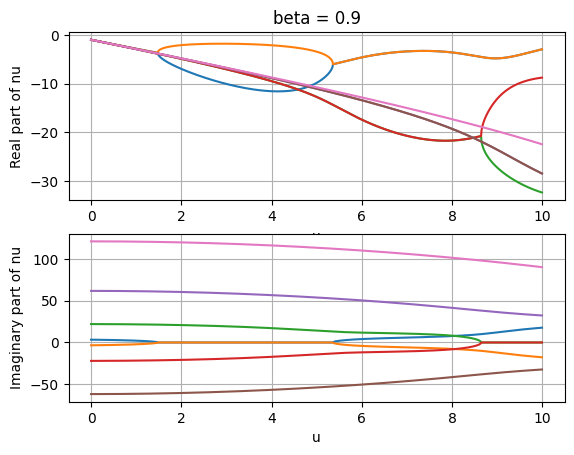

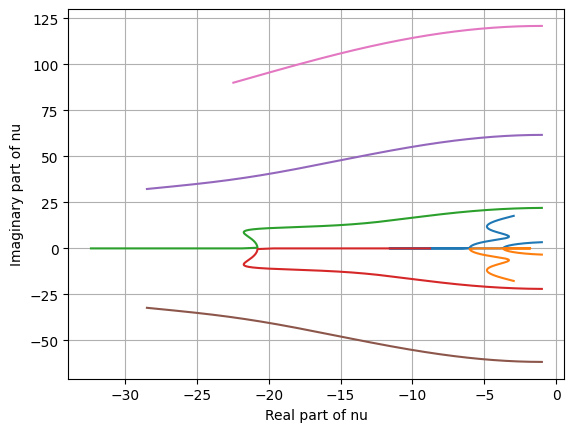

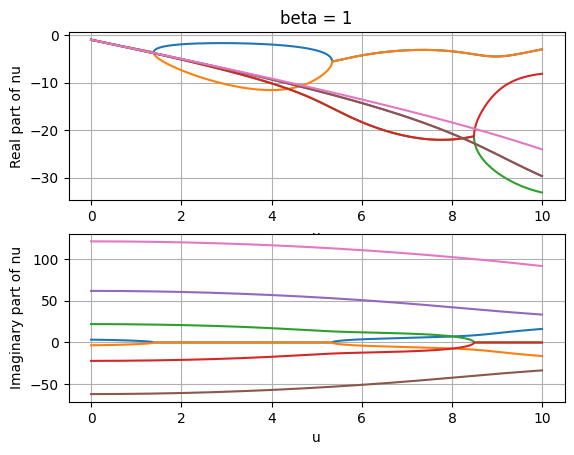

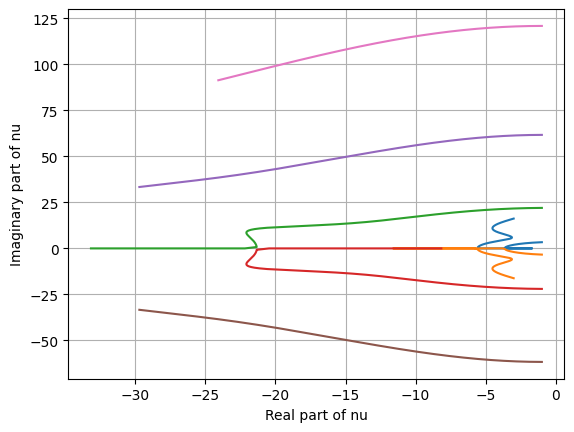

In [ ]:
#Select a value of c
c = 2


# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)


# Select a value of beta
beta = [0,0.1,0.5,0.9,1]


# evals is the array in which the eigenvalues will be stored
evals1 = np.zeros((len(u),2*N),dtype=complex)
evals2 = np.zeros((len(u),2*N),dtype=complex)
evals3 = np.zeros((len(u),2*N),dtype=complex)
evals4 = np.zeros((len(u),2*N),dtype=complex)
evals5 = np.zeros((len(u),2*N),dtype=complex)
evals0=[evals1,evals2,evals3,evals4,evals5]
# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for j in range(len(beta)):
  evals=evals0[j]
  stable=True
  for i in range(len(u)):

      # Stiffness matrix
      MK = K0+u[i]**2*C

      # Damping matrix
      MC = 2*np.sqrt(beta[j])*u[i]*B+c*I

      # Matrix for the problem at order one
      A = np.block([[O,I],[-MK,-MC]])

      # Eigenvalue problem solving
      val, vec = np.linalg.eig(A)

      # We store the current eigenvalues as a new line in the array evals
      # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
      # The next sets are sorted in order to minimise distance with previous set
      if i>0:
          evals[i,:], _ = match(evals[i-1,:],val)
      else:
          indices = np.argsort(np.abs(np.imag(val)))
          evals[i,:] = val[indices]
      for k in range(len(evals[i,:])):
        if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
          stable=False
          print('Critical velocity for instability when β=',beta[j], 'is u_c=',u[i])
  if stable==True:
    print('The system is stable for β=',beta[j])

  evals0[j]=evals
# Number of eigenvalues to plot
n=8
for i in range(len(beta)):
  f, a = plt.subplots(2,1)
  a[0].set_title('beta = '+str(beta[i]))
  a[0].grid(True)
  a[0].plot(u,np.real(evals0[i][:,0:n-1]))
  a[0].set_xlabel('u')
  a[0].set_ylabel('Real part of nu')
  plt.grid(True)
  a[1].plot(u,np.imag(evals0[i][:,0:n-1]))
  a[1].set_xlabel('u')
  a[1].set_ylabel('Imaginary part of nu')

  f1, a2 = plt.subplots(1,1)
  a2.plot(np.real(evals0[i][:,0:n-1]),np.imag(evals0[i][:,0:n-1]))
  a2.grid(True)
  a2.set_xlabel('Real part of nu')
  a2.set_ylabel('Imaginary part of nu')


### c=10

Critical velocity for instability when β= 0 is u_c= 4.93
Critical velocity for instability when β= 0 is u_c= 4.93
Critical velocity for instability when β= 0.1 is u_c= 6.0200000000000005
Critical velocity for instability when β= 0.1 is u_c= 6.0200000000000005
Critical velocity for instability when β= 0.5 is u_c= 9.200000000000001
Critical velocity for instability when β= 0.5 is u_c= 9.200000000000001
The system is stable for β= 0.9
The system is stable for β= 1


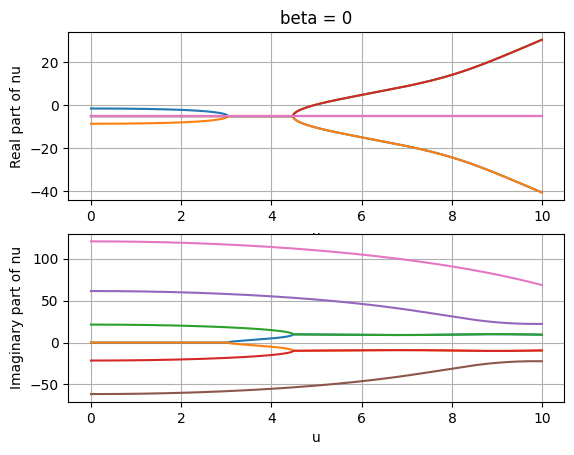

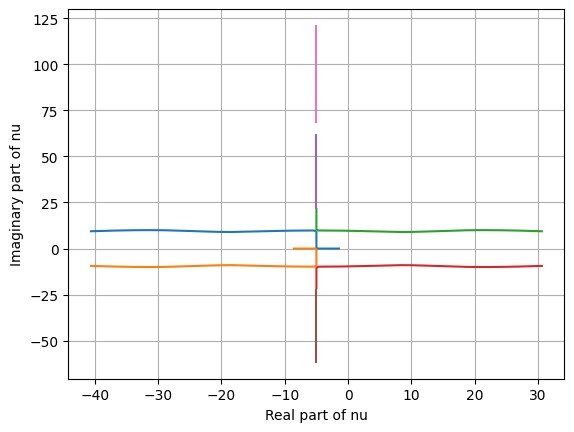

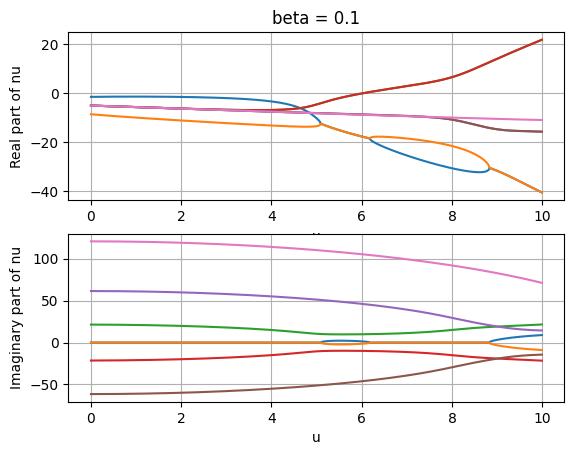

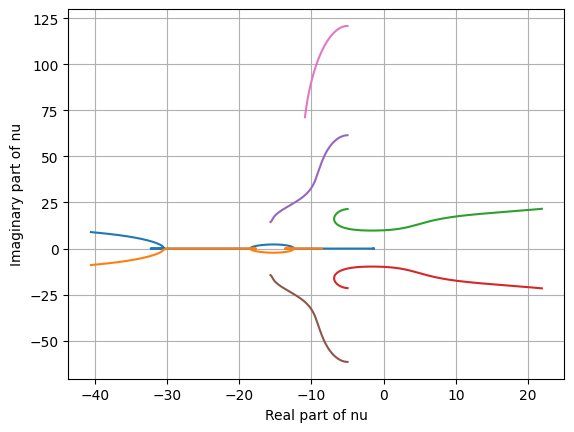

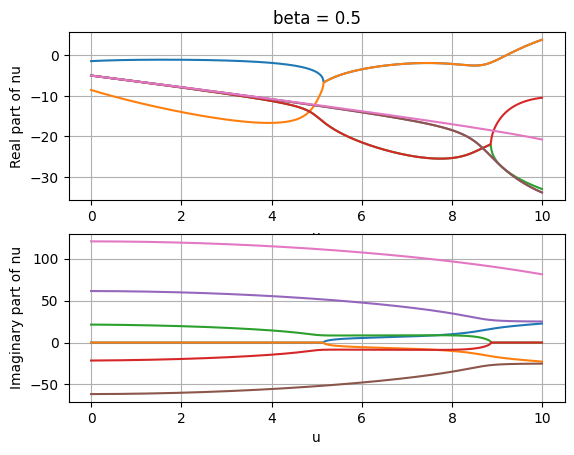

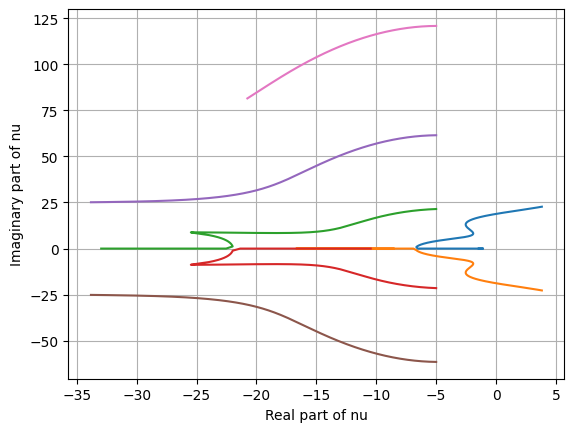

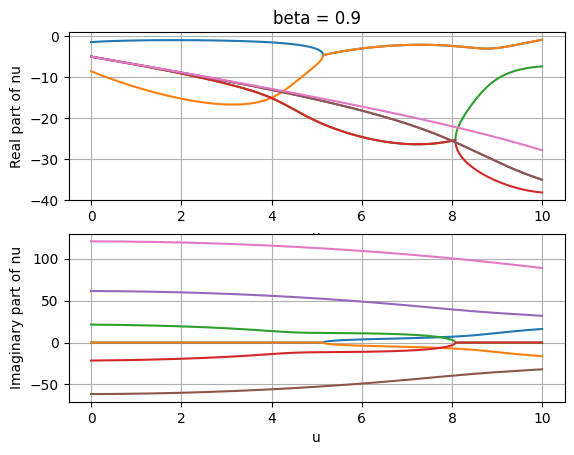

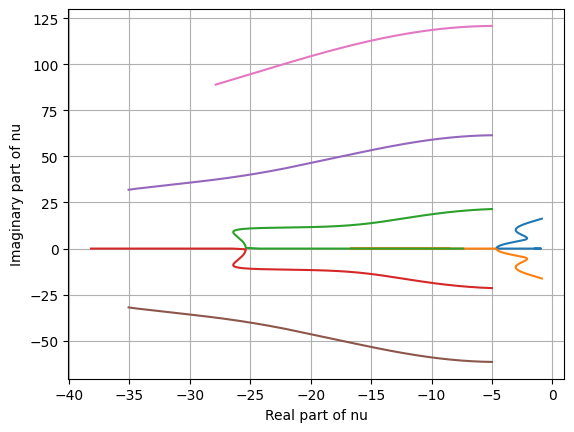

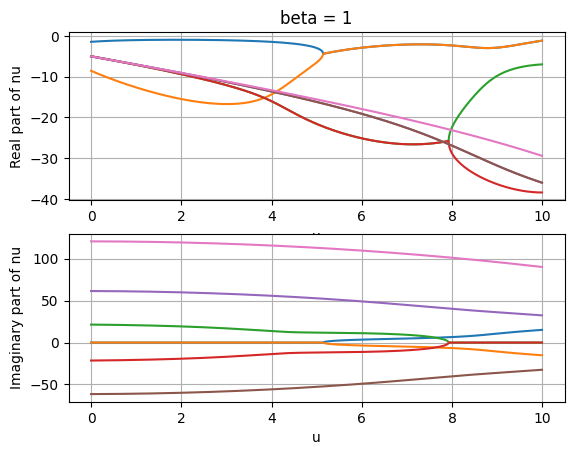

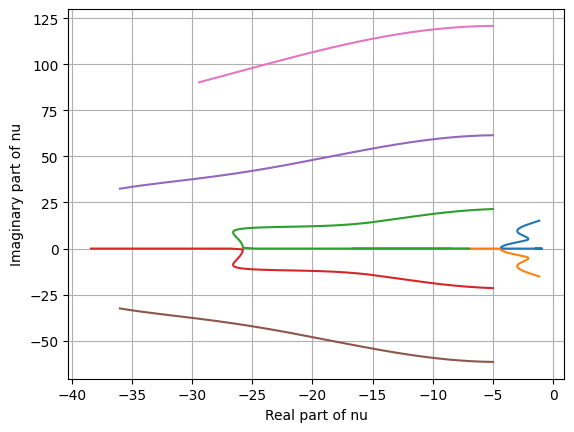

In [ ]:

#Select a value of c
c = 10


# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)


# Select a value of beta
beta = [0,0.1,0.5,0.9,1]


# evals is the array in which the eigenvalues will be stored
evals1 = np.zeros((len(u),2*N),dtype=complex)
evals2 = np.zeros((len(u),2*N),dtype=complex)
evals3 = np.zeros((len(u),2*N),dtype=complex)
evals4 = np.zeros((len(u),2*N),dtype=complex)
evals5 = np.zeros((len(u),2*N),dtype=complex)
evals0=[evals1,evals2,evals3,evals4,evals5]
# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for j in range(len(beta)):
  evals=evals0[j]
  stable=True
  for i in range(len(u)):

      # Stiffness matrix
      MK = K0+u[i]**2*C

      # Damping matrix
      MC = 2*np.sqrt(beta[j])*u[i]*B+c*I

      # Matrix for the problem at order one
      A = np.block([[O,I],[-MK,-MC]])

      # Eigenvalue problem solving
      val, vec = np.linalg.eig(A)

      # We store the current eigenvalues as a new line in the array evals
      # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
      # The next sets are sorted in order to minimise distance with previous set
      if i>0:
          evals[i,:], _ = match(evals[i-1,:],val)
      else:
          indices = np.argsort(np.abs(np.imag(val)))
          evals[i,:] = val[indices]
      for k in range(len(evals[i,:])):
        if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
          stable=False
          print('Critical velocity for instability when β=',beta[j], 'is u_c=',u[i])
  if stable==True:
    print('The system is stable for β=',beta[j])

  evals0[j]=evals
# Number of eigenvalues to plot
n=8
for i in range(len(beta)):
  f, a = plt.subplots(2,1)
  a[0].set_title('beta = '+str(beta[i]))
  a[0].grid(True)
  a[0].plot(u,np.real(evals0[i][:,0:n-1]))
  a[0].set_xlabel('u')
  a[0].set_ylabel('Real part of nu')
  plt.grid(True)
  a[1].plot(u,np.imag(evals0[i][:,0:n-1]))
  a[1].set_xlabel('u')
  a[1].set_ylabel('Imaginary part of nu')

  f1, a2 = plt.subplots(1,1)
  a2.plot(np.real(evals0[i][:,0:n-1]),np.imag(evals0[i][:,0:n-1]))
  a2.grid(True)
  a2.set_xlabel('Real part of nu')
  a2.set_ylabel('Imaginary part of nu')


### c=20

Critical velocity for instability when β= 0 is u_c= 5.49
Critical velocity for instability when β= 0 is u_c= 5.49
Critical velocity for instability when β= 0.1 is u_c= 6.38
Critical velocity for instability when β= 0.1 is u_c= 6.38
Critical velocity for instability when β= 0.5 is u_c= 8.84
Critical velocity for instability when β= 0.5 is u_c= 8.84
Critical velocity for instability when β= 0.9 is u_c= 9.64
Critical velocity for instability when β= 0.9 is u_c= 9.64
Critical velocity for instability when β= 1 is u_c= 9.790000000000001
Critical velocity for instability when β= 1 is u_c= 9.790000000000001


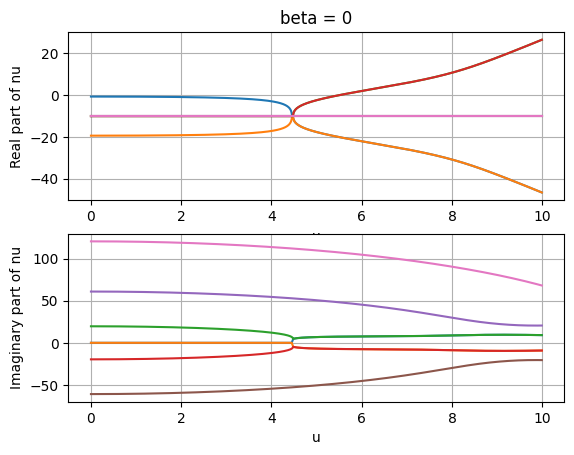

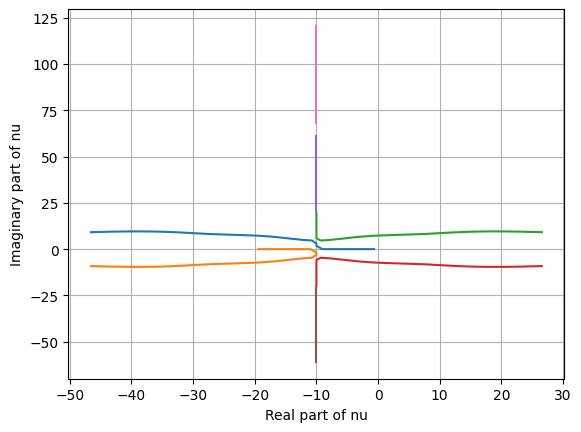

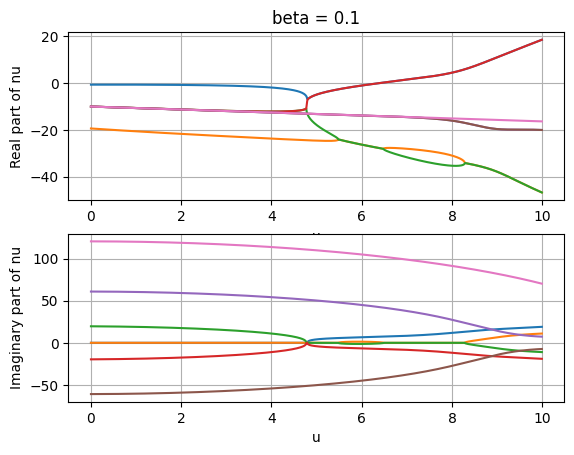

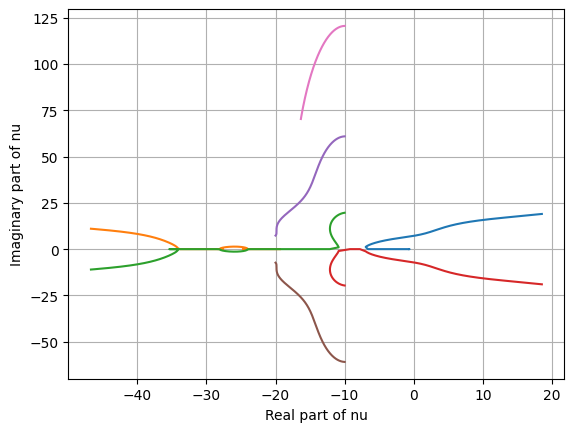

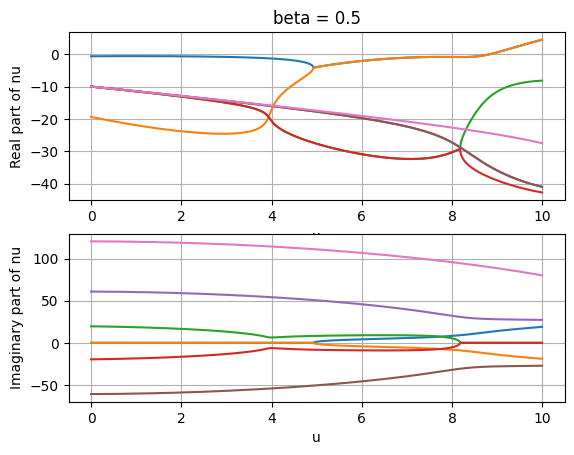

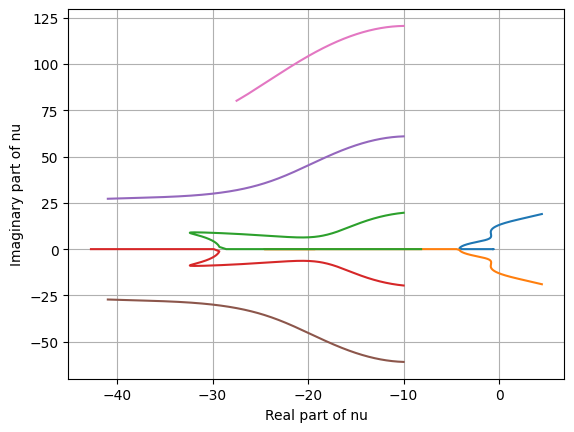

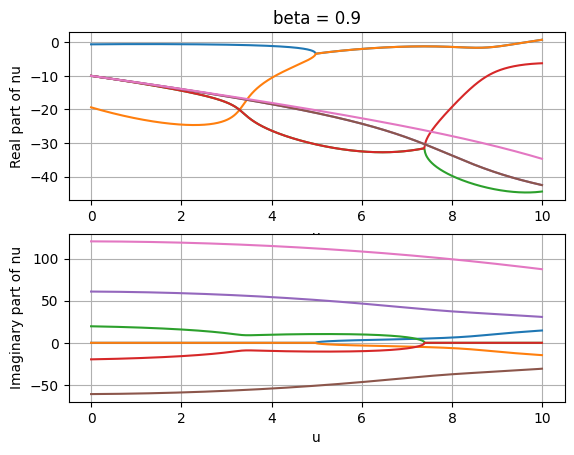

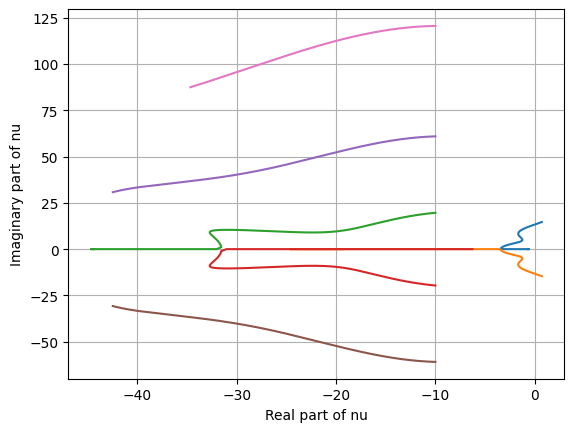

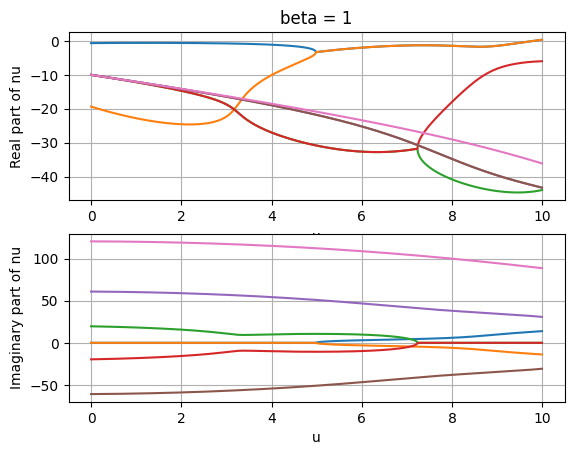

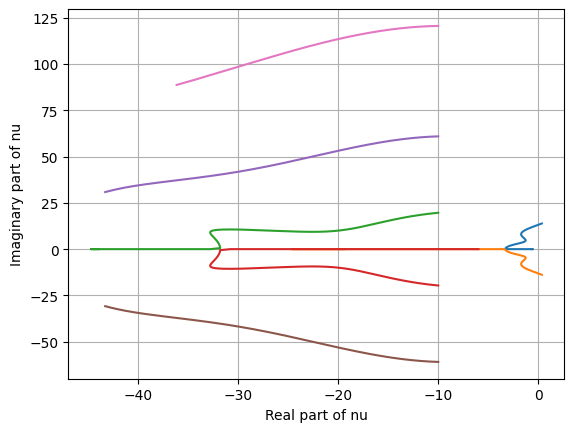

In [ ]:
#Select a value of c
c = 20


# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)


# Select a value of beta
beta = [0,0.1,0.5,0.9,1]


# evals is the array in which the eigenvalues will be stored
evals1 = np.zeros((len(u),2*N),dtype=complex)
evals2 = np.zeros((len(u),2*N),dtype=complex)
evals3 = np.zeros((len(u),2*N),dtype=complex)
evals4 = np.zeros((len(u),2*N),dtype=complex)
evals5 = np.zeros((len(u),2*N),dtype=complex)
evals0=[evals1,evals2,evals3,evals4,evals5]
# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for j in range(len(beta)):
  evals=evals0[j]
  stable=True
  for i in range(len(u)):

      # Stiffness matrix
      MK = K0+u[i]**2*C

      # Damping matrix
      MC = 2*np.sqrt(beta[j])*u[i]*B+c*I

      # Matrix for the problem at order one
      A = np.block([[O,I],[-MK,-MC]])

      # Eigenvalue problem solving
      val, vec = np.linalg.eig(A)

      # We store the current eigenvalues as a new line in the array evals
      # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
      # The next sets are sorted in order to minimise distance with previous set
      if i>0:
          evals[i,:], _ = match(evals[i-1,:],val)
      else:
          indices = np.argsort(np.abs(np.imag(val)))
          evals[i,:] = val[indices]
      for k in range(len(evals[i,:])):
        if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
          stable=False
          print('Critical velocity for instability when β=',beta[j], 'is u_c=',u[i])
  if stable==True:
    print('The system is stable for β=',beta[j])

  evals0[j]=evals
# Number of eigenvalues to plot
n=8
for i in range(len(beta)):
  f, a = plt.subplots(2,1)
  a[0].set_title('beta = '+str(beta[i]))
  a[0].grid(True)
  a[0].plot(u,np.real(evals0[i][:,0:n-1]))
  a[0].set_xlabel('u')
  a[0].set_ylabel('Real part of nu')
  plt.grid(True)
  a[1].plot(u,np.imag(evals0[i][:,0:n-1]))
  a[1].set_xlabel('u')
  a[1].set_ylabel('Imaginary part of nu')

  f1, a2 = plt.subplots(1,1)
  a2.plot(np.real(evals0[i][:,0:n-1]),np.imag(evals0[i][:,0:n-1]))
  a2.grid(True)
  a2.set_xlabel('Real part of nu')
  a2.set_ylabel('Imaginary part of nu')


### c=100

Critical velocity for instability when β= 0 is u_c= 6.1000000000000005
Critical velocity for instability when β= 0 is u_c= 6.1000000000000005
Critical velocity for instability when β= 0.1 is u_c= 6.3100000000000005
Critical velocity for instability when β= 0.1 is u_c= 6.3100000000000005
Critical velocity for instability when β= 0.5 is u_c= 6.6000000000000005
Critical velocity for instability when β= 0.5 is u_c= 6.6000000000000005
Critical velocity for instability when β= 0.9 is u_c= 6.8
Critical velocity for instability when β= 0.9 is u_c= 6.8
Critical velocity for instability when β= 1 is u_c= 6.84
Critical velocity for instability when β= 1 is u_c= 6.84


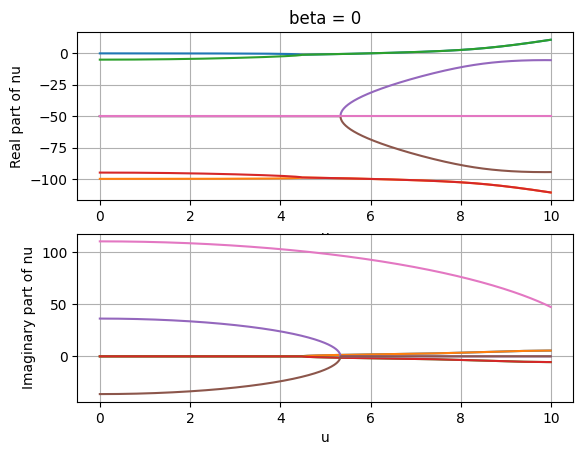

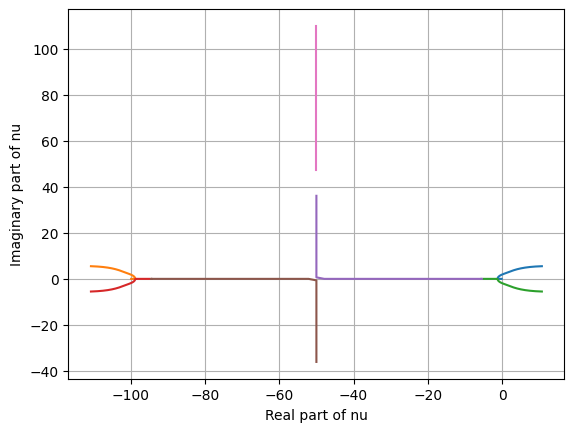

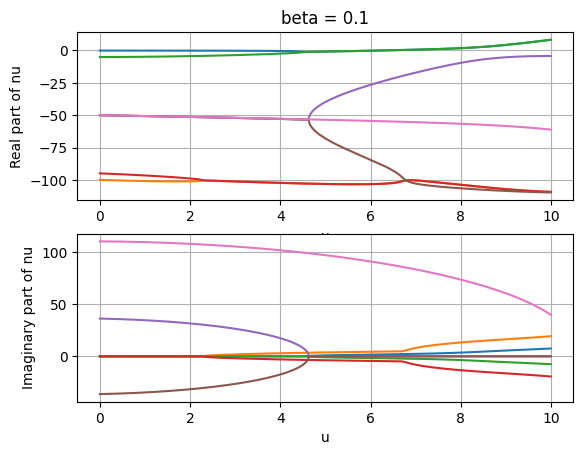

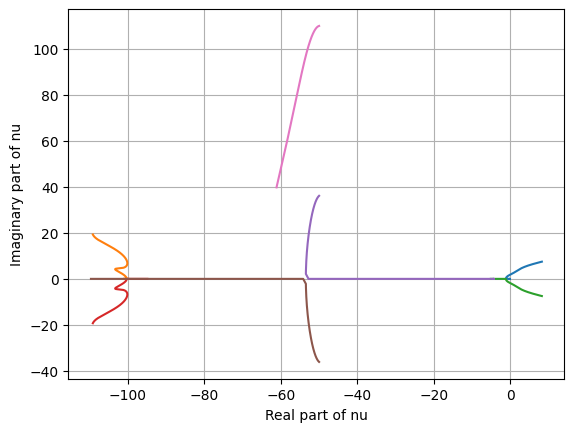

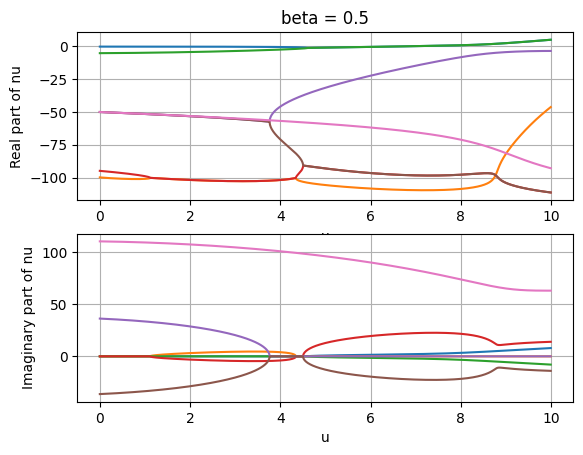

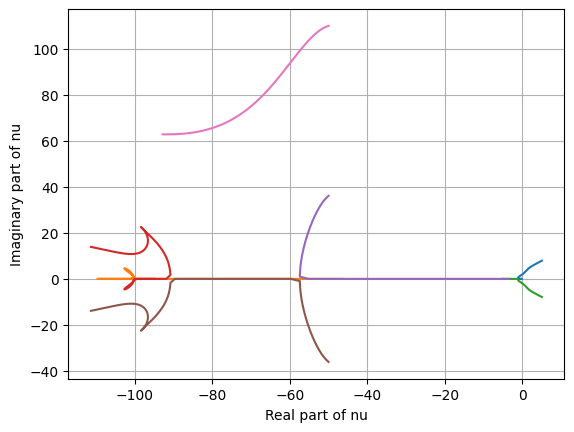

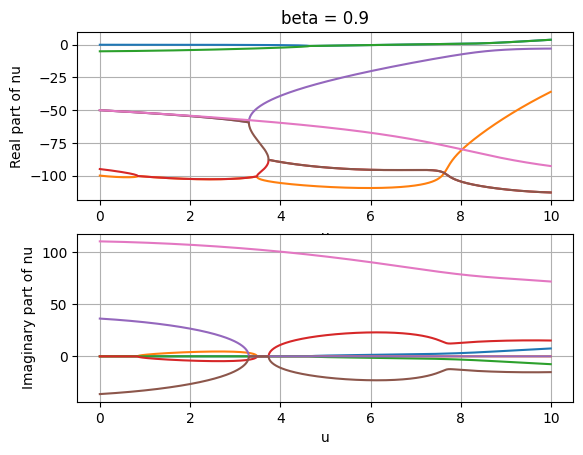

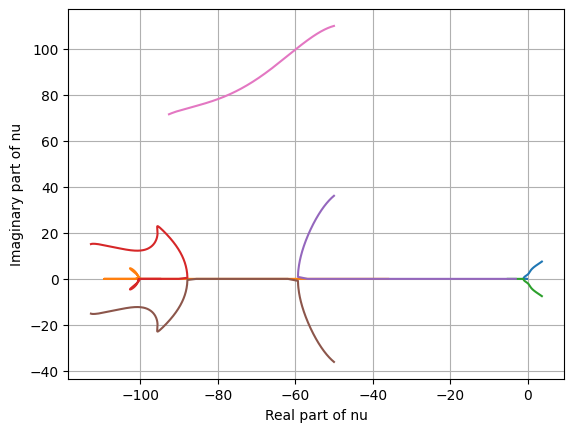

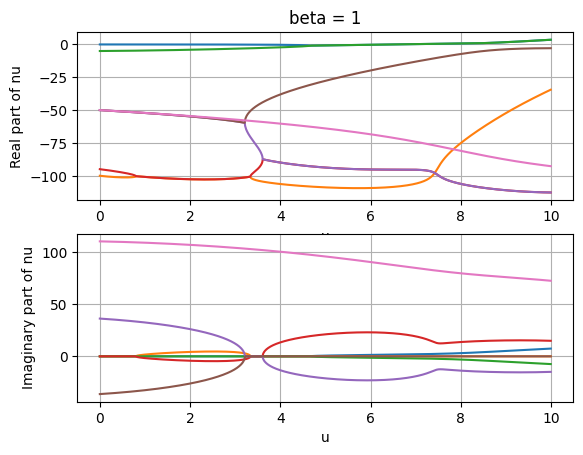

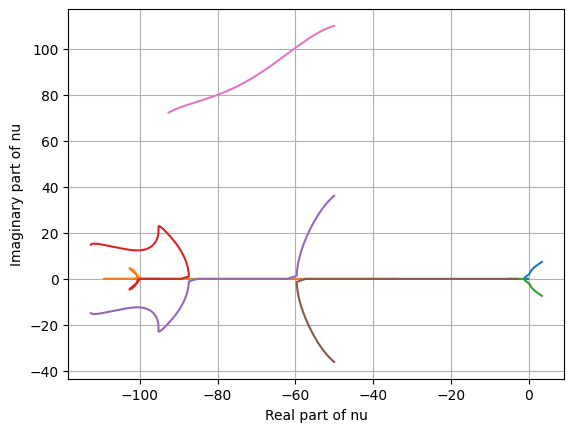

In [ ]:
#Select a value of c
c = 100


# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)


# Select a value of beta
beta = [0,0.1,0.5,0.9,1]


# evals is the array in which the eigenvalues will be stored
evals1 = np.zeros((len(u),2*N),dtype=complex)
evals2 = np.zeros((len(u),2*N),dtype=complex)
evals3 = np.zeros((len(u),2*N),dtype=complex)
evals4 = np.zeros((len(u),2*N),dtype=complex)
evals5 = np.zeros((len(u),2*N),dtype=complex)
evals0=[evals1,evals2,evals3,evals4,evals5]
# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for j in range(len(beta)):
  evals=evals0[j]
  stable=True
  for i in range(len(u)):

      # Stiffness matrix
      MK = K0+u[i]**2*C

      # Damping matrix
      MC = 2*np.sqrt(beta[j])*u[i]*B+c*I

      # Matrix for the problem at order one
      A = np.block([[O,I],[-MK,-MC]])

      # Eigenvalue problem solving
      val, vec = np.linalg.eig(A)

      # We store the current eigenvalues as a new line in the array evals
      # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
      # The next sets are sorted in order to minimise distance with previous set
      if i>0:
          evals[i,:], _ = match(evals[i-1,:],val)
      else:
          indices = np.argsort(np.abs(np.imag(val)))
          evals[i,:] = val[indices]
      for k in range(len(evals[i,:])):
        if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
          stable=False
          print('Critical velocity for instability when β=',beta[j], 'is u_c=',u[i])
  if stable==True:
    print('The system is stable for β=',beta[j])

  evals0[j]=evals
# Number of eigenvalues to plot
n=8
for i in range(len(beta)):
  f, a = plt.subplots(2,1)
  a[0].set_title('beta = '+str(beta[i]))
  a[0].grid(True)
  a[0].plot(u,np.real(evals0[i][:,0:n-1]))
  a[0].set_xlabel('u')
  a[0].set_ylabel('Real part of nu')
  plt.grid(True)
  a[1].plot(u,np.imag(evals0[i][:,0:n-1]))
  a[1].set_xlabel('u')
  a[1].set_ylabel('Imaginary part of nu')

  f1, a2 = plt.subplots(1,1)
  a2.plot(np.real(evals0[i][:,0:n-1]),np.imag(evals0[i][:,0:n-1]))
  a2.grid(True)
  a2.set_xlabel('Real part of nu')
  a2.set_ylabel('Imaginary part of nu')


### c=1000

Critical velocity for instability when β= 0 is u_c= 6.140000000000001
Critical velocity for instability when β= 0 is u_c= 6.140000000000001
Critical velocity for instability when β= 0.1 is u_c= 6.16
Critical velocity for instability when β= 0.1 is u_c= 6.16
Critical velocity for instability when β= 0.5 is u_c= 6.19
Critical velocity for instability when β= 0.5 is u_c= 6.19
Critical velocity for instability when β= 0.9 is u_c= 6.21
Critical velocity for instability when β= 0.9 is u_c= 6.21
Critical velocity for instability when β= 1 is u_c= 6.21
Critical velocity for instability when β= 1 is u_c= 6.21


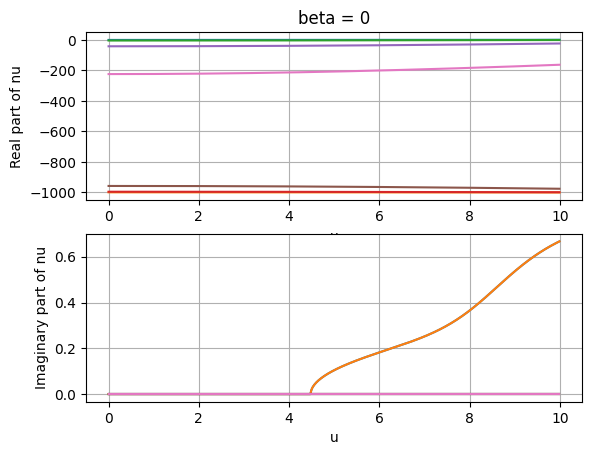

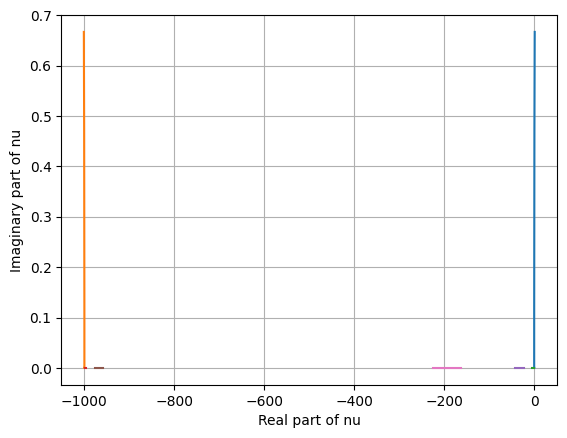

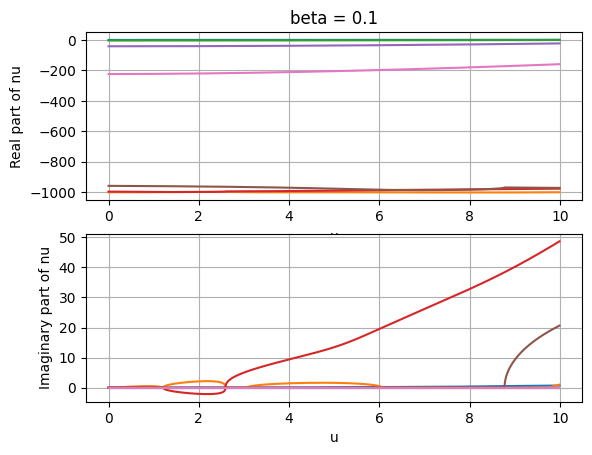

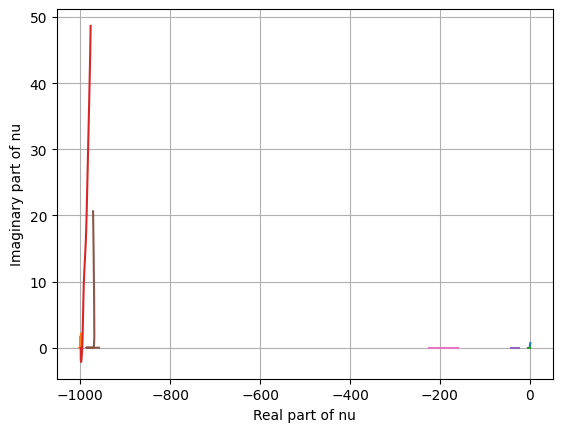

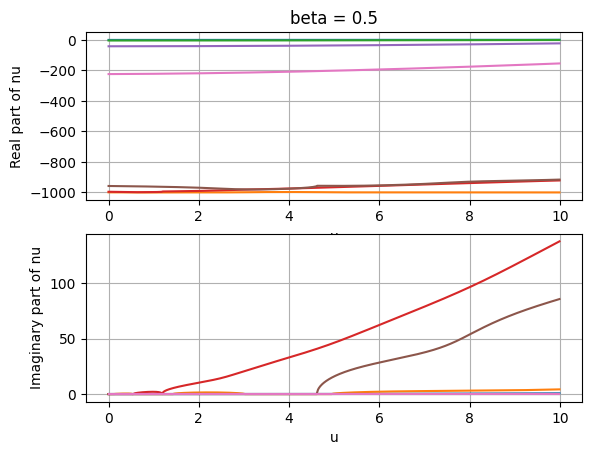

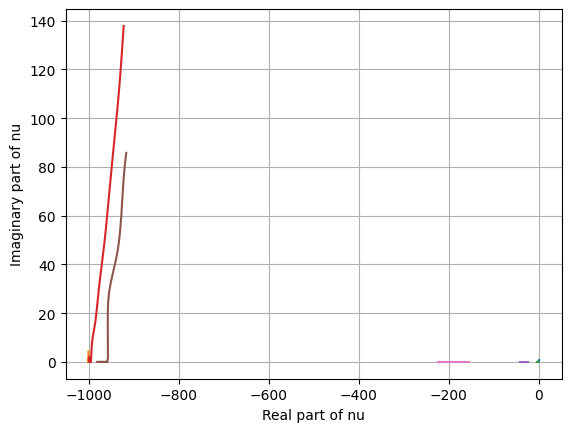

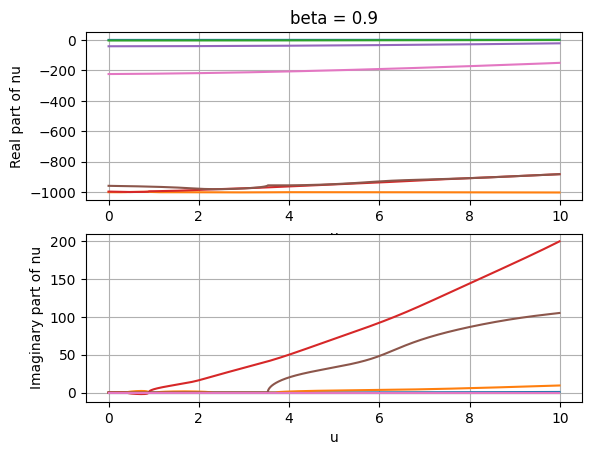

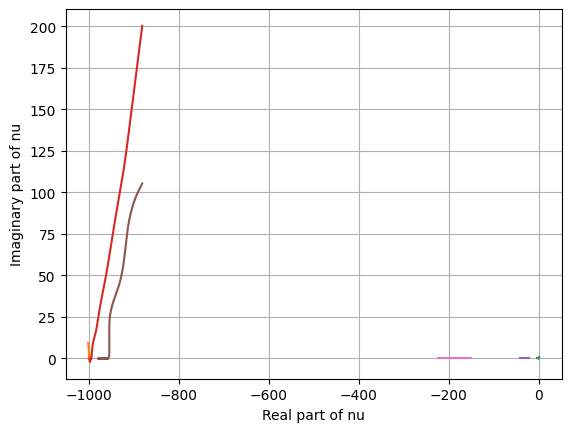

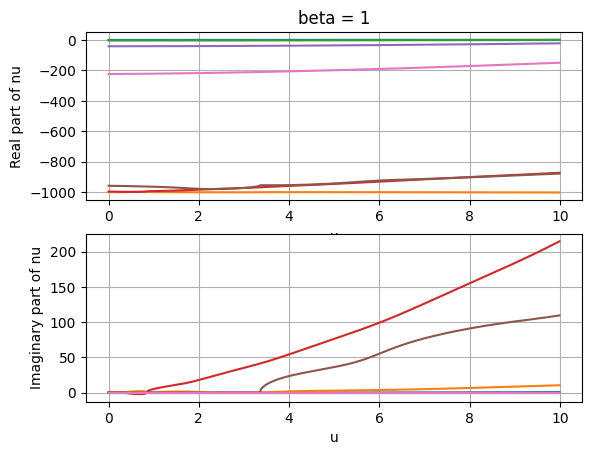

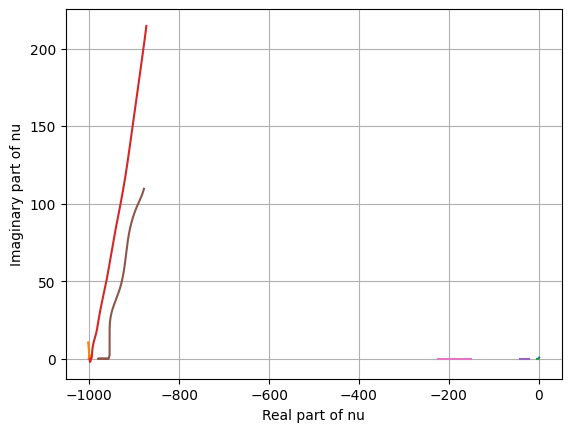

In [ ]:
#Select a value of c
c = 1000


# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)


# Select a value of beta
beta = [0,0.1,0.5,0.9,1]


# evals is the array in which the eigenvalues will be stored
evals1 = np.zeros((len(u),2*N),dtype=complex)
evals2 = np.zeros((len(u),2*N),dtype=complex)
evals3 = np.zeros((len(u),2*N),dtype=complex)
evals4 = np.zeros((len(u),2*N),dtype=complex)
evals5 = np.zeros((len(u),2*N),dtype=complex)
evals0=[evals1,evals2,evals3,evals4,evals5]
# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for j in range(len(beta)):
  evals=evals0[j]
  stable=True
  for i in range(len(u)):

      # Stiffness matrix
      MK = K0+u[i]**2*C

      # Damping matrix
      MC = 2*np.sqrt(beta[j])*u[i]*B+c*I

      # Matrix for the problem at order one
      A = np.block([[O,I],[-MK,-MC]])

      # Eigenvalue problem solving
      val, vec = np.linalg.eig(A)

      # We store the current eigenvalues as a new line in the array evals
      # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
      # The next sets are sorted in order to minimise distance with previous set
      if i>0:
          evals[i,:], _ = match(evals[i-1,:],val)
      else:
          indices = np.argsort(np.abs(np.imag(val)))
          evals[i,:] = val[indices]
      for k in range(len(evals[i,:])):
        if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
          stable=False
          print('Critical velocity for instability when β=',beta[j], 'is u_c=',u[i])
  if stable==True:
    print('The system is stable for β=',beta[j])

  evals0[j]=evals
# Number of eigenvalues to plot
n=8
for i in range(len(beta)):
  f, a = plt.subplots(2,1)
  a[0].set_title('beta = '+str(beta[i]))
  a[0].grid(True)
  a[0].plot(u,np.real(evals0[i][:,0:n-1]))
  a[0].set_xlabel('u')
  a[0].set_ylabel('Real part of nu')
  plt.grid(True)
  a[1].plot(u,np.imag(evals0[i][:,0:n-1]))
  a[1].set_xlabel('u')
  a[1].set_ylabel('Imaginary part of nu')

  f1, a2 = plt.subplots(1,1)
  a2.plot(np.real(evals0[i][:,0:n-1]),np.imag(evals0[i][:,0:n-1]))
  a2.grid(True)
  a2.set_xlabel('Real part of nu')
  a2.set_ylabel('Imaginary part of nu')


### c=10000

Critical velocity for instability when β= 0 is u_c= 6.140000000000001
Critical velocity for instability when β= 0 is u_c= 6.140000000000001
Critical velocity for instability when β= 0.1 is u_c= 6.15
Critical velocity for instability when β= 0.1 is u_c= 6.15
Critical velocity for instability when β= 0.5 is u_c= 6.15
Critical velocity for instability when β= 0.5 is u_c= 6.15
Critical velocity for instability when β= 0.9 is u_c= 6.15
Critical velocity for instability when β= 0.9 is u_c= 6.15
Critical velocity for instability when β= 1 is u_c= 6.15
Critical velocity for instability when β= 1 is u_c= 6.15


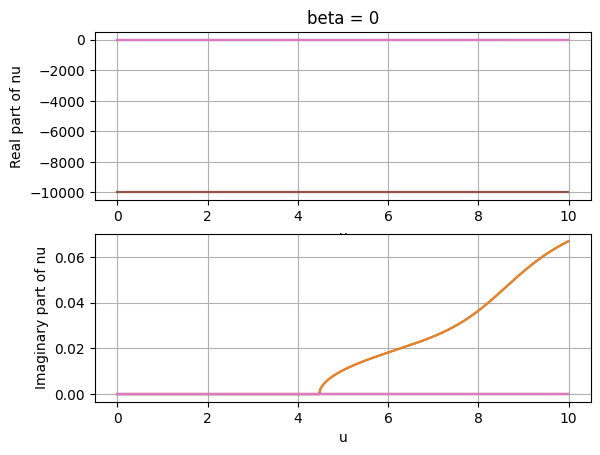

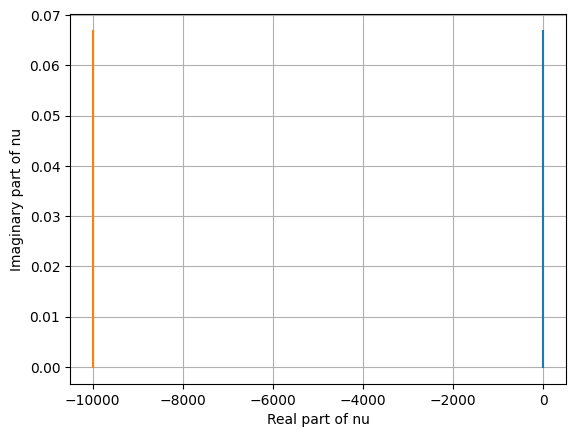

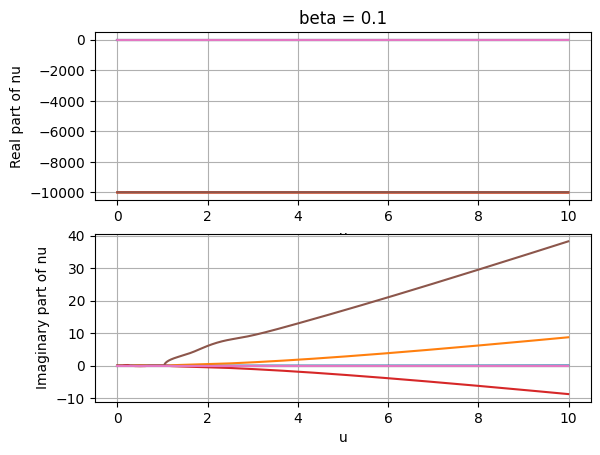

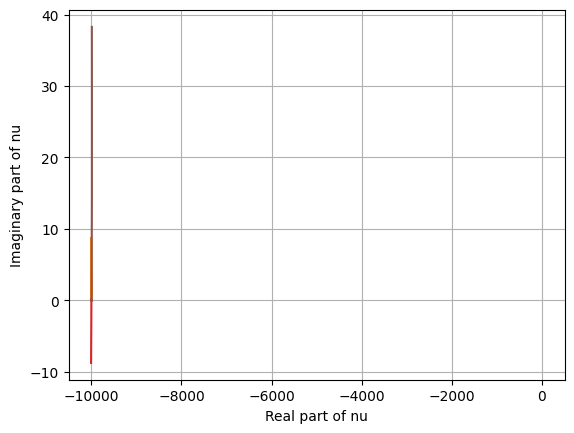

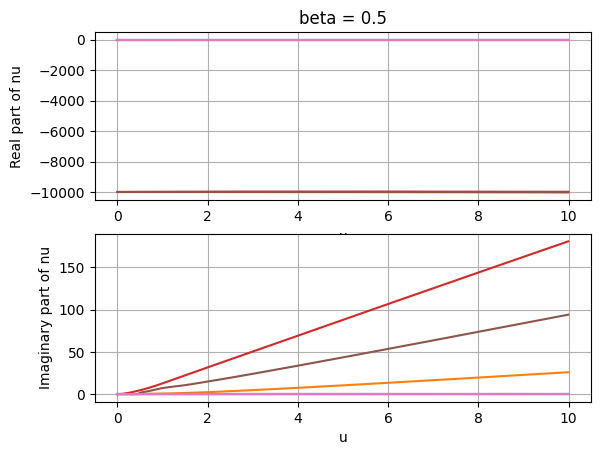

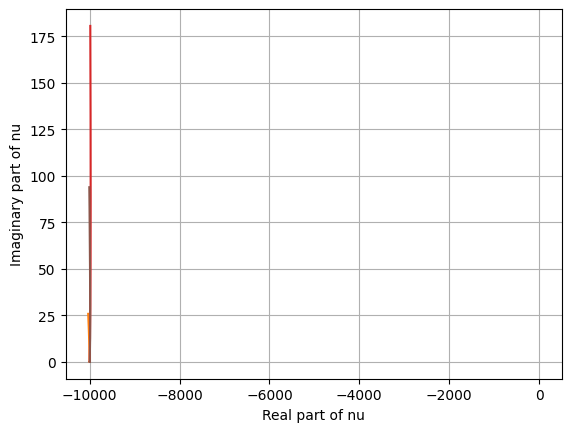

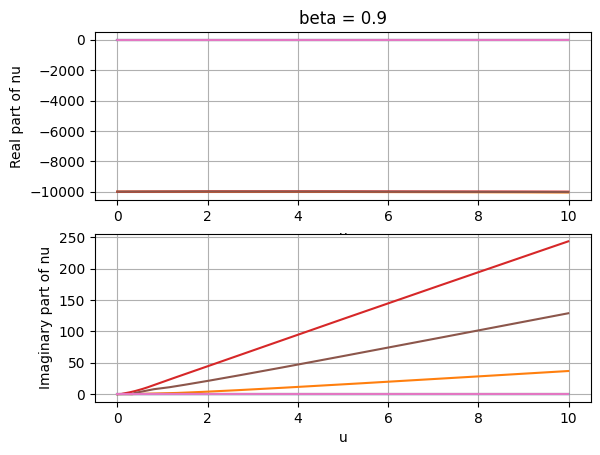

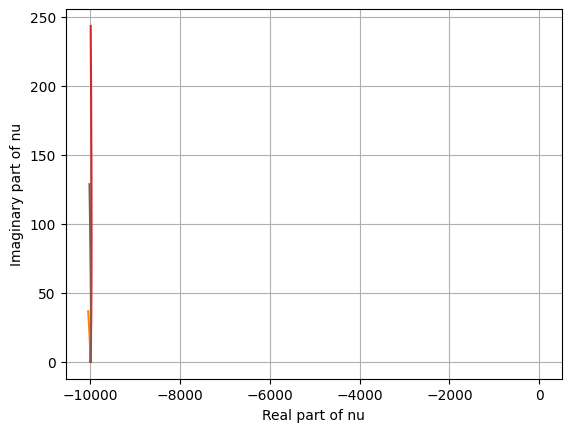

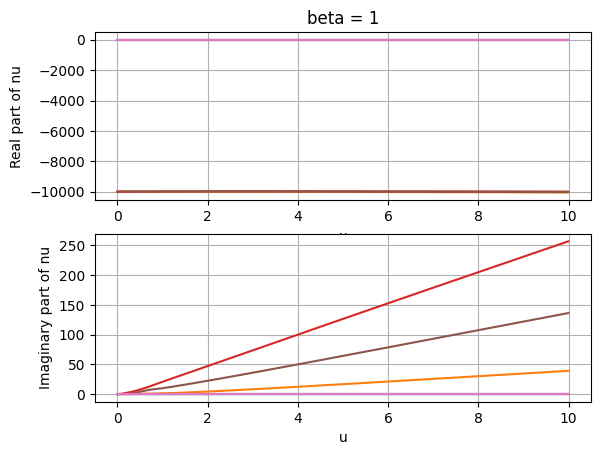

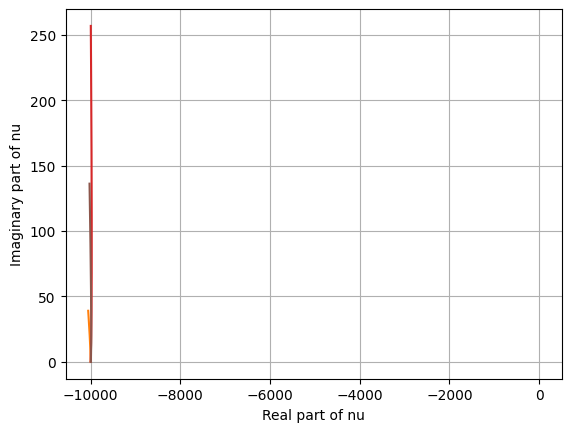

In [ ]:
#Select a value of c
c = 10000


# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)


# Select a value of beta
beta = [0,0.1,0.5,0.9,1]


# evals is the array in which the eigenvalues will be stored
evals1 = np.zeros((len(u),2*N),dtype=complex)
evals2 = np.zeros((len(u),2*N),dtype=complex)
evals3 = np.zeros((len(u),2*N),dtype=complex)
evals4 = np.zeros((len(u),2*N),dtype=complex)
evals5 = np.zeros((len(u),2*N),dtype=complex)
evals0=[evals1,evals2,evals3,evals4,evals5]
# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for j in range(len(beta)):
  evals=evals0[j]
  stable=True
  for i in range(len(u)):

      # Stiffness matrix
      MK = K0+u[i]**2*C

      # Damping matrix
      MC = 2*np.sqrt(beta[j])*u[i]*B+c*I

      # Matrix for the problem at order one
      A = np.block([[O,I],[-MK,-MC]])

      # Eigenvalue problem solving
      val, vec = np.linalg.eig(A)

      # We store the current eigenvalues as a new line in the array evals
      # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
      # The next sets are sorted in order to minimise distance with previous set
      if i>0:
          evals[i,:], _ = match(evals[i-1,:],val)
      else:
          indices = np.argsort(np.abs(np.imag(val)))
          evals[i,:] = val[indices]
      for k in range(len(evals[i,:])):
        if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
          stable=False
          print('Critical velocity for instability when β=',beta[j], 'is u_c=',u[i])
  if stable==True:
    print('The system is stable for β=',beta[j])

  evals0[j]=evals
# Number of eigenvalues to plot
n=8
for i in range(len(beta)):
  f, a = plt.subplots(2,1)
  a[0].set_title('beta = '+str(beta[i]))
  a[0].grid(True)
  a[0].plot(u,np.real(evals0[i][:,0:n-1]))
  a[0].set_xlabel('u')
  a[0].set_ylabel('Real part of nu')
  plt.grid(True)
  a[1].plot(u,np.imag(evals0[i][:,0:n-1]))
  a[1].set_xlabel('u')
  a[1].set_ylabel('Imaginary part of nu')

  f1, a2 = plt.subplots(1,1)
  a2.plot(np.real(evals0[i][:,0:n-1]),np.imag(evals0[i][:,0:n-1]))
  a2.grid(True)
  a2.set_xlabel('Real part of nu')
  a2.set_ylabel('Imaginary part of nu')


### Additional Evidence from Q7 Corroborating the Q6 Findings

In our codes, we try to introduce a _'stable'_ criterion and an _'if'_ function to valuate system stability and compute the critical velocity for instability $u_c$. But when this analysis is performed in the codes for the _free-clamped_ undamped system where $\beta =0$ and _clapmed-camped_ undamped system where $\beta = 0.5$, the algorithm outputs multiple 'critical' velocities for instability $u_c$ are output in the range $[0,10]$. We attribute this behavior to the undamped system artifacts. In the absence of damping ($c=0$), numerical oscillations near $Re(\nu)=0$ (e.g., sequences like $[-1e-14, +1e-14, -1e-15]$) produce spurious zero-crossings. These artifacts arise because eigenvalues cluster tightly around the stability boundary without inherent stabilization, leading to false-positive instability detections. However, the damped system avoids this issue through the $cI$ term in the damping matrix $MC = 2\sqrt{\beta}uB + cI$ actively shifts eigenvalues leftward ($Re(\nu)$ more negative), creating clean, monotonic transitions, ensuring a well-defined single crossing point $u_c$, while numerically it suppresses artifacts that would otherwise generate multiple false positives in undamped systems. Physically, this reflects how energy dissipation smoothes the transition to instability by preventing eigenvalue 'bouncing' near critical points.

The 'bouncing' phenomenon is observed in the undamped system under the _free-clamped_ boundary condition for $\beta =0$. But we can also observer this phenomenon in the undamped system under _clamped-clamped_ boundary condition even with $\beta = 0.5$ (much larger than $0$). It is further justified that the systems under _clamped-clamped_ boundary condition are less stable than the system under _free-clamped_ boundary condition. And for the damped system, this phenomenon never exists. We can therefor rank the stability of these cases as:

damped case$>$free-clamped undamped case$>$clamped-clamped undamped case





### Here, we test the code by setting $\beta=0$ and $c=0.1$.

流式输出内容被截断，只能显示最后 5000 行内容。
-1.4210854715202004e-14 7.105427357601002e-14
Critical velocity for instability when β= 0 is u_c= 7.04
-1.4210854715202004e-14 7.105427357601002e-14
Critical velocity for instability when β= 0 is u_c= 7.04
-4.973799150320701e-14 3.552713678800501e-14
Critical velocity for instability when β= 0 is u_c= 7.04
-4.973799150320701e-14 3.552713678800501e-14
Critical velocity for instability when β= 0 is u_c= 7.04
-3.552713678800501e-14 2.1316282072803006e-14
Critical velocity for instability when β= 0 is u_c= 7.04
-3.552713678800501e-14 2.1316282072803006e-14
Critical velocity for instability when β= 0 is u_c= 7.04
-2.1316282072803006e-14 3.552713678800501e-14
Critical velocity for instability when β= 0 is u_c= 7.05
-2.1316282072803006e-14 3.552713678800501e-14
Critical velocity for instability when β= 0 is u_c= 7.05
-1.4210854715202004e-14 8.171241461241152e-14
Critical velocity for instability when β= 0 is u_c= 7.05
-1.4210854715202004e-14 8.171241461241152e-14
Cr

Text(0, 0.5, 'Imaginary part of nu')

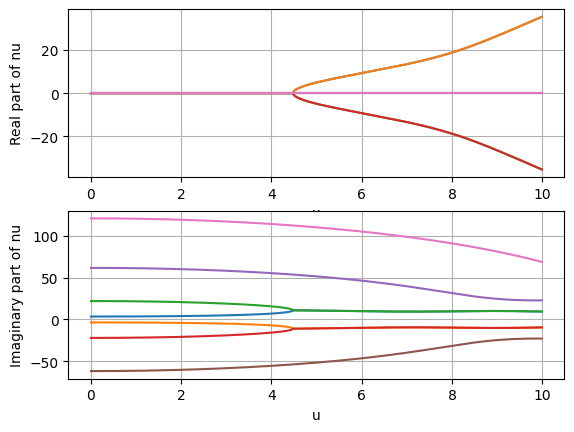

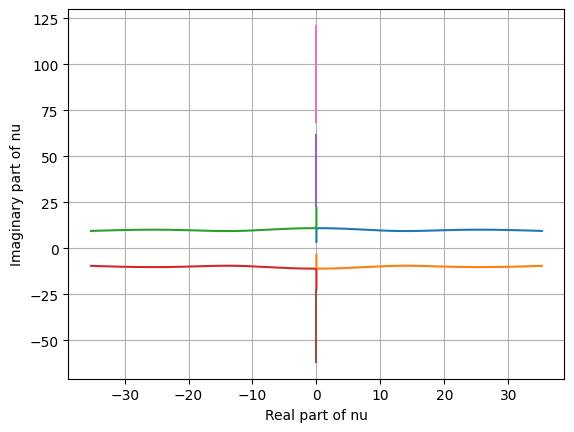

In [ ]:
# Select a value of beta
beta = 0

# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,10,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)

# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)
#Instability creterion
stable=True
# We solve an eigenvalue problem for each value of u
for i in range(len(u)):

    # Stiffness matrix
    MK = K0+u[i]**2*C

    # Damping matrix
    MC = 2*np.sqrt(beta)*u[i]*B

    # Matrix for the problem at order one
    A = np.block([[O,I],[-MK,-MC]])

    # Eigenvalue problem solving
    val, vec = np.linalg.eig(A)

    # We store the current eigenvalues as a new line in the array evals
    # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
    # The next sets are sorted in order to minimise distance with previous set
    if i>0:
        evals[i,:], _ = match(evals[i-1,:],val)
    else:
        indices = np.argsort(np.abs(np.imag(val)))
        evals[i,:] = val[indices]
    for k in range(len(evals[i,:])):
      if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
        stable=False
        print(np.real(evals[i-1,k]),np.real(evals[i,k]))
        print('Critical velocity for instability when β=',beta, 'is u_c=',u[i])
if stable==True:
  print('The system is stable for β=',beta)
# Number of eigenvalues to plot
n=8

f, a = plt.subplots(2,1)
a[0].grid(True)
a[0].plot(u,np.real(evals[:,0:n-1]))
a[0].set_xlabel('u')
a[0].set_ylabel('Real part of nu')
plt.grid(True)
a[1].plot(u,np.imag(evals[:,0:n-1]))
a[1].set_xlabel('u')
a[1].set_ylabel('Imaginary part of nu')

f1, a2 = plt.subplots(1,1)
a2.plot(np.real(evals[:,0:n-1]),np.imag(evals[:,0:n-1]))
a2.grid(True)
a2.set_xlabel('Real part of nu')
a2.set_ylabel('Imaginary part of nu')

### To visualize this ‘bouncing’ phenomenon, we adjust $u$ within the range [0,6] and plot the corresponding results

Text(0, 0.5, 'Imaginary part of nu')

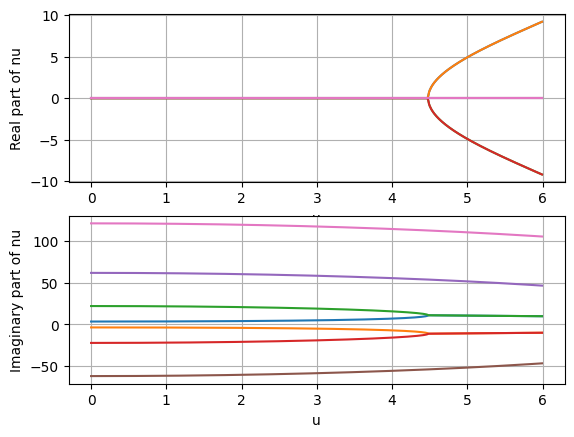

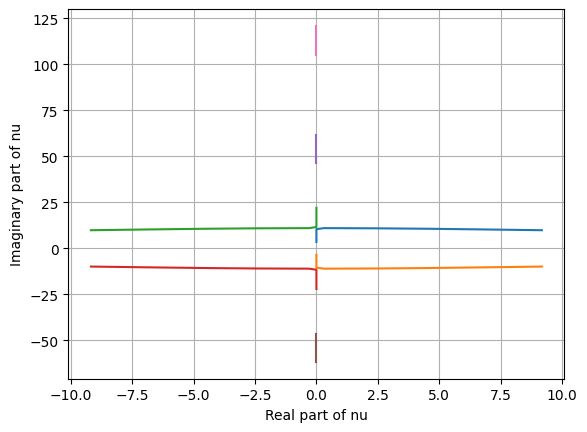

In [ ]:
# Select a value of beta
beta = 0

# The eigenvalue problem will be solved for values of u in a range
u = np.arange(0,6,0.01)

# evals is the array in which the eigenvalues will be stored
evals = np.zeros((len(u),2*N),dtype=complex)

# We create a matrix full of zeroes and the identity matrix
O = np.zeros((N,N))
I = np.eye(N)
# We solve an eigenvalue problem for each value of u
for i in range(len(u)):

    # Stiffness matrix
    MK = K0+u[i]**2*C

    # Damping matrix
    MC = 2*np.sqrt(beta)*u[i]*B

    # Matrix for the problem at order one
    A = np.block([[O,I],[-MK,-MC]])

    # Eigenvalue problem solving
    val, vec = np.linalg.eig(A)

    # We store the current eigenvalues as a new line in the array evals
    # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
    # The next sets are sorted in order to minimise distance with previous set
    if i>0:
        evals[i,:], _ = match(evals[i-1,:],val)
    else:
        indices = np.argsort(np.abs(np.imag(val)))
        evals[i,:] = val[indices]

# Number of eigenvalues to plot
n=8

f, a = plt.subplots(2,1)
a[0].grid(True)
a[0].plot(u,np.real(evals[:,0:n-1]))
a[0].set_xlabel('u')
a[0].set_ylabel('Real part of nu')
plt.grid(True)
a[1].plot(u,np.imag(evals[:,0:n-1]))
a[1].set_xlabel('u')
a[1].set_ylabel('Imaginary part of nu')

f1, a2 = plt.subplots(1,1)
a2.plot(np.real(evals[:,0:n-1]),np.imag(evals[:,0:n-1]))
a2.grid(True)
a2.set_xlabel('Real part of nu')
a2.set_ylabel('Imaginary part of nu')

### The system under clamped-clamped boundary condition for $\beta=0.5$

流式输出内容被截断，只能显示最后 5000 行内容。
-1.0658141036401503e-14 7.105427357601002e-15
Critical velocity for instability when β= 0.5 is u_c= 6.74
-3.197442310920451e-14 2.4868995751603507e-14
Critical velocity for instability when β= 0.5 is u_c= 6.75
-3.197442310920451e-14 2.4868995751603507e-14
Critical velocity for instability when β= 0.5 is u_c= 6.75
-3.552713678800501e-15 3.552713678800501e-15
Critical velocity for instability when β= 0.5 is u_c= 6.75
-3.552713678800501e-15 3.552713678800501e-15
Critical velocity for instability when β= 0.5 is u_c= 6.75
-3.552713678800501e-15 2.6645352591003757e-15
Critical velocity for instability when β= 0.5 is u_c= 6.75
-3.552713678800501e-15 2.6645352591003757e-15
Critical velocity for instability when β= 0.5 is u_c= 6.75
-1.4210854715202004e-14 4.973799150320701e-14
Critical velocity for instability when β= 0.5 is u_c= 6.76
-1.4210854715202004e-14 4.973799150320701e-14
Critical velocity for instability when β= 0.5 is u_c= 6.76
-2.1316282072803006e-14 1.0658

Text(0, 0.5, 'Imaginary part of nu')

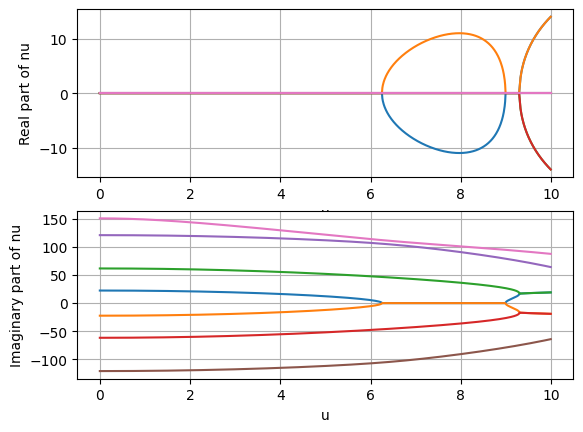

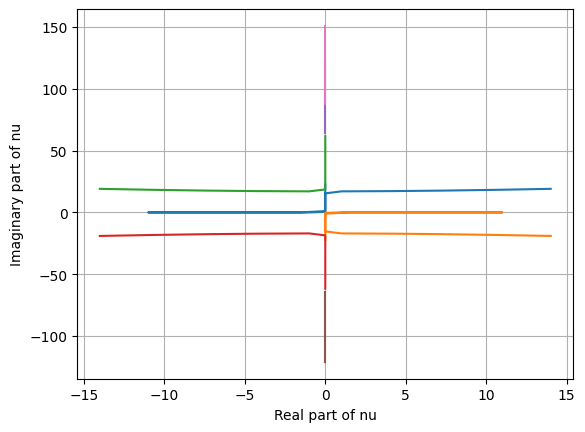

In [ ]:
# Change boundary conditions to clamped-clamped
from beam_functions import mode_clacla, lambdasigma_clacla, coefs_clacla

# Generate lambda and sigma for clamped-clamped beam
lamb, sig = lambdasigma_clacla(N)

# Recompute mode shapes phi with new boundary conditions
x = np.linspace(0, 1, 101)  # Discretize the pipe length
phi = mode_clacla(lamb, sig, x, n=0)  # Undeflected mode shapes

# Coefficients phi_i * phi_j
M = coefs(N,0,0,0)
# Recompute system matrices with clamped-clamped basis
B = coefs_clacla(N, 0, 1, 0)  # Cross-coupling matrix (modes × mode derivatives)
C = coefs_clacla(N, 0, 2, 0)  # Centrifugal stiffness matrix
K0 = coefs_clacla(N, 0, 4, 0)  # Structural stiffness matrix (diagonal)
# We use the same beta with question before
beta = 0.5
# Initialize eigenvalue analysis parameters
u = np.arange(0, 10, 0.01)  # Velocity range to scan
evals = np.zeros((len(u),2*N),dtype=complex)

# Zero and identity matrices for state-space formulation
O = np.zeros((N,N))
I = np.eye(N)
#Instability Criterion
stable = True
# We solve an eigenvalue problem for each value of u
for i in range(len(u)):

    # Stiffness matrix
    MK = K0+u[i]**2*C

    # Damping matrix
    MC = 2*np.sqrt(beta)*u[i]*B

    # Matrix for the problem at order one
    A = np.block([[O,I],[-MK,-MC]])

    # Eigenvalue problem solving
    val, vec = np.linalg.eig(A)

    # We store the current eigenvalues as a new line in the array evals
    # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
    # The next sets are sorted in order to minimise distance with previous set
    if i>0:
        evals[i,:], _ = match(evals[i-1,:],val)
    else:
        indices = np.argsort(np.abs(np.imag(val)))
        evals[i,:] = val[indices]
    for k in range(len(evals[i,:])):
      if np.real(evals[i,k])>0 and np.real(evals[i-1,k])<0:
        stable=False
        print(np.real(evals[i-1,k]),np.real(evals[i,k]))
        print('Critical velocity for instability when β=',beta, 'is u_c=',u[i])
if stable==True:
  print('The system is stable for β=',beta)
# Number of eigenvalues to plot
n=8

f, a = plt.subplots(2,1)
a[0].grid(True)
a[0].plot(u,np.real(evals[:,0:n-1]))
a[0].set_xlabel('u')
a[0].set_ylabel('Real part of nu')
plt.grid(True)
a[1].plot(u,np.imag(evals[:,0:n-1]))
a[1].set_xlabel('u')
a[1].set_ylabel('Imaginary part of nu')

f1, a2 = plt.subplots(1,1)
a2.plot(np.real(evals[:,0:n-1]),np.imag(evals[:,0:n-1]))
a2.grid(True)
a2.set_xlabel('Real part of nu')
a2.set_ylabel('Imaginary part of nu')


### To visualize this ‘bouncing’ phenomenon, we adjust $u$ within the range [0,6] and plot the corresponding results

Text(0, 0.5, 'Imaginary part of nu')

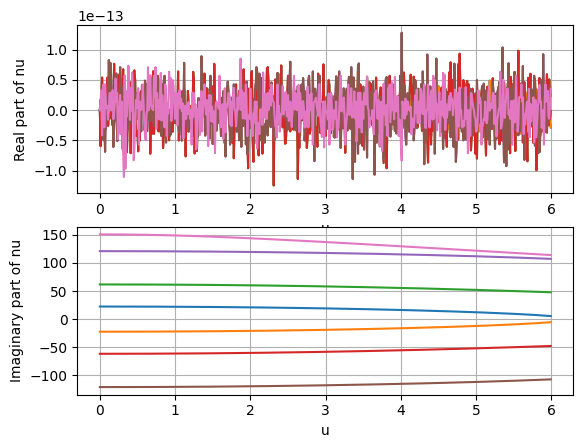

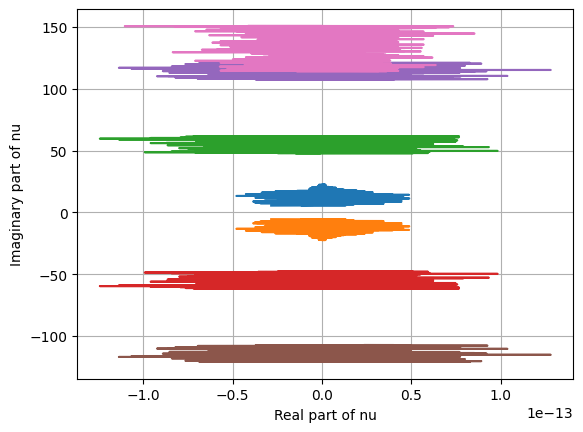

In [ ]:
# Change boundary conditions to clamped-clamped
from beam_functions import mode_clacla, lambdasigma_clacla, coefs_clacla

# Generate lambda and sigma for clamped-clamped beam
lamb, sig = lambdasigma_clacla(N)

# Recompute mode shapes phi with new boundary conditions
x = np.linspace(0, 1, 101)  # Discretize the pipe length
phi = mode_clacla(lamb, sig, x, n=0)  # Undeflected mode shapes

# Coefficients phi_i * phi_j
M = coefs(N,0,0,0)
# Recompute system matrices with clamped-clamped basis
B = coefs_clacla(N, 0, 1, 0)  # Cross-coupling matrix (modes × mode derivatives)
C = coefs_clacla(N, 0, 2, 0)  # Centrifugal stiffness matrix
K0 = coefs_clacla(N, 0, 4, 0)  # Structural stiffness matrix (diagonal)
# We use the same beta with question before
beta = 0.5
# Initialize eigenvalue analysis parameters
u = np.arange(0, 6, 0.01)  # Velocity range to scan
evals = np.zeros((len(u),2*N),dtype=complex)

# Zero and identity matrices for state-space formulation
O = np.zeros((N,N))
I = np.eye(N)

# We solve an eigenvalue problem for each value of u
for i in range(len(u)):

    # Stiffness matrix
    MK = K0+u[i]**2*C

    # Damping matrix
    MC = 2*np.sqrt(beta)*u[i]*B

    # Matrix for the problem at order one
    A = np.block([[O,I],[-MK,-MC]])

    # Eigenvalue problem solving
    val, vec = np.linalg.eig(A)

    # We store the current eigenvalues as a new line in the array evals
    # We sort the first set by ascending imaginary part absolute values (ascending frequencies)
    # The next sets are sorted in order to minimise distance with previous set
    if i>0:
        evals[i,:], _ = match(evals[i-1,:],val)
    else:
        indices = np.argsort(np.abs(np.imag(val)))
        evals[i,:] = val[indices]
# Number of eigenvalues to plot
n=8

f, a = plt.subplots(2,1)
a[0].grid(True)
a[0].plot(u,np.real(evals[:,0:n-1]))
a[0].set_xlabel('u')
a[0].set_ylabel('Real part of nu')
plt.grid(True)
a[1].plot(u,np.imag(evals[:,0:n-1]))
a[1].set_xlabel('u')
a[1].set_ylabel('Imaginary part of nu')

f1, a2 = plt.subplots(1,1)
a2.plot(np.real(evals[:,0:n-1]),np.imag(evals[:,0:n-1]))
a2.grid(True)
a2.set_xlabel('Real part of nu')
a2.set_ylabel('Imaginary part of nu')
